In [1]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from IPython.display import HTML

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Reading dataset**

In [3]:
df = pd.read_csv("BRFSS.csv")

## **INITAL EXPLORATION**

**Number of rows and columns of the dataset**

In [4]:
print("Filas: ", df.shape[0])
print("Columnas: ", df.shape[1])

Filas:  441456
Columnas:  330


**First dataset rows**

In [5]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


**Description of the dataset**

In [6]:
df.describe()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,441456.000000,441456.000000,441456.000000,4.414560e+05,4.414560e+05,254645.0,254645.000000,45.0,254643.0,254646.000000,...,441456.000000,441456.000000,438657.000000,438657.000000,438657.000000,441456.000000,441456.000000,157954.000000,157954.000000,398069.000000
mean,29.968715,6.359676,1115.040457,2.015005e+09,2.015005e+09,1.0,1.000177,1.0,1.0,1.545133,...,3.494124,2.742695,2.716879,2.815149,3.652717,1.824624,1.887028,2.290705,2.412259,1.970156
std,16.034710,3.487131,35.746794,4.113443e+03,4.113443e+03,0.0,0.013292,0.0,0.0,0.497960,...,2.398322,2.449676,1.324145,1.356101,1.266730,2.360812,2.351387,2.518086,2.778032,1.441119
min,1.000000,1.000000,1100.000000,2.015000e+09,2.015000e+09,1.0,1.000000,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,1100.000000,2.015002e+09,2.015002e+09,1.0,1.000000,1.0,1.0,1.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,29.000000,6.000000,1100.000000,2.015004e+09,2.015004e+09,1.0,1.000000,1.0,1.0,2.000000,...,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,44.000000,9.000000,1100.000000,2.015007e+09,2.015007e+09,1.0,1.000000,1.0,1.0,2.000000,...,4.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,72.000000,12.000000,1200.000000,2.015023e+09,2.015023e+09,1.0,2.000000,1.0,1.0,2.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


**Dataset information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


**Single report to see from the dataframe: overview, variables information and characteristics, interactions, correlations, missing values, sample and duplicate rows**

In [8]:
# Create the yData profile report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True) # , minimal=True

# To display the report in a Jupyter notebook
# profile.to_widgets()

In [9]:
# profile.to_file("Report_PandasProfiling.html") # export report to html file

----

## **DATA CLEANING & PRE-PROCESSING**

### **Filtering**

**Set the variables of Diabetes and CHD between 0=no and 1=yes**

In [10]:
# DIABETE3 (Variable of Diabetes)
# 0 for no diabetes or only during pregnancy or pre-diabetes or borderline diabetes
# 1 for yes diabetes
# Remove all the 7 (dont knows)
# Remove all the 9 (refused)

df['DIABETE3'] = df['DIABETE3'].replace({2:0, 3:0, 4:0})
df = df[df.DIABETE3 != 7]
df = df[df.DIABETE3 != 9]
df = df.dropna(subset=['DIABETE3'])
df.DIABETE3.unique()

array([0., 1.])

In [11]:
# _MICHD (Variable of CHD)
# Change 2 for 0 because that means did not have MI or CHD
# 0 is for no MI or CHD
# 1 is for yes MI or CHD

df['_MICHD'] = df['_MICHD'].replace({2: 0})
df = df.dropna(subset=['_MICHD'])
df._MICHD.unique()

array([0., 1.])

**Filtering by Diabetes and Age > 35 years old**

In [12]:
# Rows and columns with the dataset filtered by people with Diabetes and Age
df_filtered = df[df["DIABETE3"] == 1]
df_filtered = df_filtered[df_filtered["_AGEG5YR"] > 3]

### **Treatment of variables**

**List of non-numeric variables / columns**

In [13]:
# Non-numeric variables
non_numeric_columns = df_filtered.select_dtypes(exclude=[np.number]).columns.tolist()
non_numeric_columns

['IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'PCDMDECN', 'EXACTOT1', 'EXACTOT2']

**Frequency of each value**

In [14]:
for column in non_numeric_columns:
    print(f"{column} - count of unique values:")
    print(df_filtered[column].value_counts())  # Shows the frequency of each value
    print("\n")

IDATE - count of unique values:
IDATE
b'12032015'    340
b'06022015'    313
b'03042015'    286
b'07072015'    284
b'03032015'    279
              ... 
b'01292016'      2
b'01012016'      2
b'03072016'      2
b'02222016'      1
b'03052016'      1
Name: count, Length: 404, dtype: int64


IMONTH - count of unique values:
IMONTH
b'11'    5118
b'03'    5051
b'02'    4701
b'12'    4619
b'08'    4617
b'10'    4605
b'07'    4599
b'01'    4569
b'06'    4522
b'04'    4490
b'05'    4456
b'09'    4014
Name: count, dtype: int64


IDAY - count of unique values:
IDAY
b'09'    2472
b'03'    2353
b'08'    2305
b'07'    2283
b'02'    2274
b'06'    2244
b'04'    2243
b'10'    2166
b'14'    2124
b'12'    2119
b'11'    2059
b'05'    2008
b'13'    1988
b'15'    1980
b'16'    1939
b'17'    1862
b'18'    1837
b'01'    1775
b'21'    1730
b'20'    1722
b'19'    1644
b'22'    1641
b'23'    1507
b'24'    1383
b'28'    1243
b'27'    1218
b'26'    1183
b'25'    1180
b'30'    1146
b'29'    1141
b'31'     592
Name: 

**Elimination of non-numeric variables (useless in this case)**

In [15]:
# Delete non-numeric columns (they are useless)
data_cleaned = df_filtered.drop(non_numeric_columns, axis=1)

**Elimination of useless variables (extra info on age and heart)**

In [16]:
data_cleaned = data_cleaned.drop(
    ['_STATE', 'FMONTH', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 
     'STATERES', 'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN','NUMWOMEN', 'CTELNUM1', 'CELLFON2', 'CADULT', 'PVTRESD2', 
     'CCLGHOUS', 'CSTATE', 'LANDLINE', 'HHADULT', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'ASTHNOW', 'DIABETE3', 'DIABAGE2', 
     'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'VETERAN3', 'SEATBELT', 'FLSHTMY2', 'HIVTSTD3','WHRTST10', 'PREDIAB1', 'VIPRFVS2', 
     '_RFHYPE5', '_RFCHOL', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_AGE65YR', '_AGE80', '_AGE_G', 'QSTLANG', '_SMOKER3', 
     '_RFHLTH'], axis=1)

### **Missing values**

**Percentage of Nans per column**

In [17]:
# Calculation of the percentage of Nans per column
missing_percentage = data_cleaned.isnull().mean() * 100

# Show columns with Nans sorted in descending order
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
missing_percentage_sorted

PAINACT2    100.000000
QLMENTL2    100.000000
QLSTRES2    100.000000
QLHLTH2     100.000000
VIEYEXM2    100.000000
               ...    
_LMTACT1      0.615957
_LMTWRK1      0.615957
_LMTSCL1      0.615957
_DRDXAR1      0.615957
_STRWT        0.001806
Length: 202, dtype: float64

**Histogram of number columns per percentage of Nans**

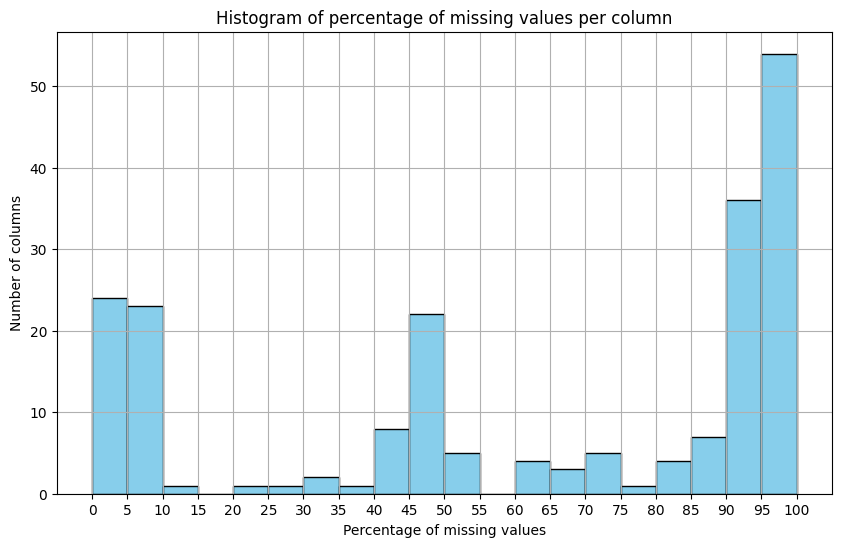

In [18]:
# Define histogram limits
bins = np.arange(0, 105, 5)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(missing_percentage_sorted, bins=bins, color='skyblue', edgecolor='black')
plt.xticks(bins)
plt.xlabel('Percentage of missing values')
plt.ylabel('Number of columns')
plt.title('Histogram of percentage of missing values per column')
plt.grid(True)
plt.show()

**Percentage of NaNs of whole dataframe before elimination**

In [19]:
total_nans = data_cleaned.isna().sum().sum()
total_elementos = data_cleaned.size  
percentage_nans_total = (total_nans / total_elementos) * 100

print("Percentage of total NaNs in the DataFrame:", int(percentage_nans_total), "%")

Percentage of total NaNs in the DataFrame: 45 %


**Elimination of columns with +30% of Nans**

In [20]:
# Remove columns with more than 30% missing values
columns_to_drop = missing_percentage_sorted[missing_percentage_sorted > 30].index
data_cleaned2 = data_cleaned.drop(columns=columns_to_drop)

# New percentage of Nans for remaining columns
new_missing_percentage = data_cleaned2.isnull().mean() * 100
new_missing_percentage_sorted = new_missing_percentage[new_missing_percentage > 0].sort_values(ascending=False)
new_missing_percentage_sorted

_CHISPNC    28.473113
BPMEDS      24.459457
_VEGESUM    11.739311
_FRUTSUM     9.638554
STRFREQ_     9.170716
HIVTST6      9.143621
_AIDTST3     9.143621
VEGEDA1_     9.085819
PNEUVAC3     8.874478
FLUSHOT6     8.758874
BEANDAY_     8.675783
ORNGDAY_     8.314517
FTJUDA1_     8.224201
GRENDAY_     8.175430
STRENGTH     8.012861
FRUTDA1_     7.920738
_BMI5CAT     7.852098
_BMI5        7.852098
EXERANY2     7.377034
WTKG3        7.051896
VEGETAB1     6.842362
FVORANG      6.629216
FVGREEN      6.454002
FVBEANS      6.253500
FRUIT1       6.002420
FRUITJU1     5.751341
HTIN4        3.408537
ALCDAY5      3.285707
HTM4         3.144813
CHOLCHK      3.115912
TOLDHI2      3.115912
USENOW3      3.059916
SMOKE100     2.904572
DIFFALON     2.738390
DIFFDRES     2.610141
DIFFWALK     2.532469
DECIDE       2.445765
BLIND        2.315710
USEEQUIP     2.180235
QLACTLM2     1.986958
_RACE_G1     1.817164
HEIGHT3      1.219270
WEIGHT2      1.085602
INTERNET     0.897744
INCOME2      0.644858
_DRDXAR1  

**Rows and columns after column elimination with +30% Nans**

In [21]:
print("Filas: ", data_cleaned2.shape[0])
print("Columnas: ", data_cleaned2.shape[1])

Filas:  55361
Columnas:  122


**Percentage of NaNs of whole dataframe after elimination**

In [22]:
total_nans = data_cleaned2.isna().sum().sum()
total_elementos = data_cleaned2.size  
percentage_nans_total = (total_nans / total_elementos) * 100

print("Percentage of total NaNs in the DataFrame:", int(percentage_nans_total), "%")

Percentage of total NaNs in the DataFrame: 2 %


### **Variable types**

In [23]:
HTML(pd.DataFrame(data_cleaned2.dtypes, columns=['Type']).to_html())

,Type
GENHLTH,float64
PHYSHLTH,float64
MENTHLTH,float64
HLTHPLN1,float64
PERSDOC2,float64
MEDCOST,float64
CHECKUP1,float64
BPHIGH4,float64
BPMEDS,float64
CHOLCHK,float64


**Number of unique values per column**

In [24]:
unique_values = data_cleaned2.nunique()
HTML(pd.DataFrame(unique_values, columns=['Unique values']).to_html())

,Unique values
GENHLTH,7
PHYSHLTH,33
MENTHLTH,33
HLTHPLN1,4
PERSDOC2,5
MEDCOST,4
CHECKUP1,7
BPHIGH4,6
BPMEDS,4
CHOLCHK,6


**Histogram of number of unique values per column**

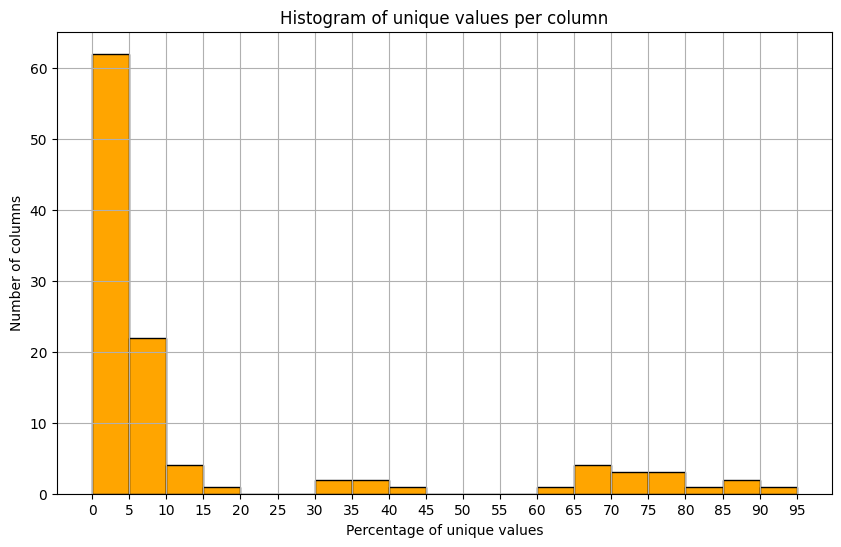

In [25]:
# Define histogram limits
bins = np.arange(0, 100, 5)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(unique_values, bins=bins, color='orange', edgecolor='black')
plt.xticks(bins)
plt.xlabel('Percentage of unique values')
plt.ylabel('Number of columns')
plt.title('Histogram of unique values per column')
plt.grid(True)
plt.show()

**Change categrical values that were encoded as floats into categorical values**

In [26]:
# Function to check it its real intenger (number.0 and not number.x)
def is_integer(x):
    try:
        return float(x).is_integer()
    except ValueError:
        return False

# Finds columns that are of type 'float64' or 'int64' and have 15 unique values or less
categories = [col for col in data_cleaned2.columns if (data_cleaned2[col].dtype == 'float64' or data_cleaned2[col].dtype == 'int64') and data_cleaned2[col].nunique() <= 15]

# Convert these columns to type 'category' only if all values are integers
for col in categories:
    # Checks if all values in the column are actually integers (.0 as fractional part)
    if all(data_cleaned2[col].dropna().apply(is_integer)):
        data_cleaned2[col] = data_cleaned2[col].astype('category')

**Variable types before categorical change**

In [27]:
HTML(pd.DataFrame(data_cleaned2.dtypes, columns=['Type']).to_html())

,Type
GENHLTH,category
PHYSHLTH,float64
MENTHLTH,float64
HLTHPLN1,category
PERSDOC2,category
MEDCOST,category
CHECKUP1,category
BPHIGH4,category
BPMEDS,category
CHOLCHK,category


**We put Median in Nans of numeric columns and Mode in Nans of categorical columns.**

In [28]:
# Iterate over each column in the DataFrame
for column in data_cleaned2.columns:
    
    if data_cleaned2[column].dtype == 'category':
        # Calculate the mode for each categorical column and fill in NaNs
        mode = data_cleaned2[column].mode()[0] # We use [0] to select the most frequent mode in case of ties.
        # Impute the fashion in the missing values
        data_cleaned2[column] = data_cleaned2[column].fillna(mode)
    
    elif data_cleaned2[column].dtype == 'float64':
        # Calculate the median for each numerical column and fill in NaNs
        median = data_cleaned2[column].median()
        # Impute the median in missing values
        data_cleaned2[column] = data_cleaned2[column].fillna(median)

**Nans Verification**

In [29]:
# Check for existence of Nans after adding medians and modes
missing_values_after_imputation = data_cleaned2.isnull().sum()  # Total Nans per columna
total_missing_values = missing_values_after_imputation.sum()  # Total Nans in all dataframe
print("Shape: ", data_cleaned2.shape)

# Print the total Nans and the Nans per column if they exist
print("Total de Nans en todo el DataFrame:", total_missing_values)

Shape:  (55361, 122)
Total de Nans en todo el DataFrame: 0


-----------

## **EXPLORATORY DATA ANALYSIS**

**Correlation map**

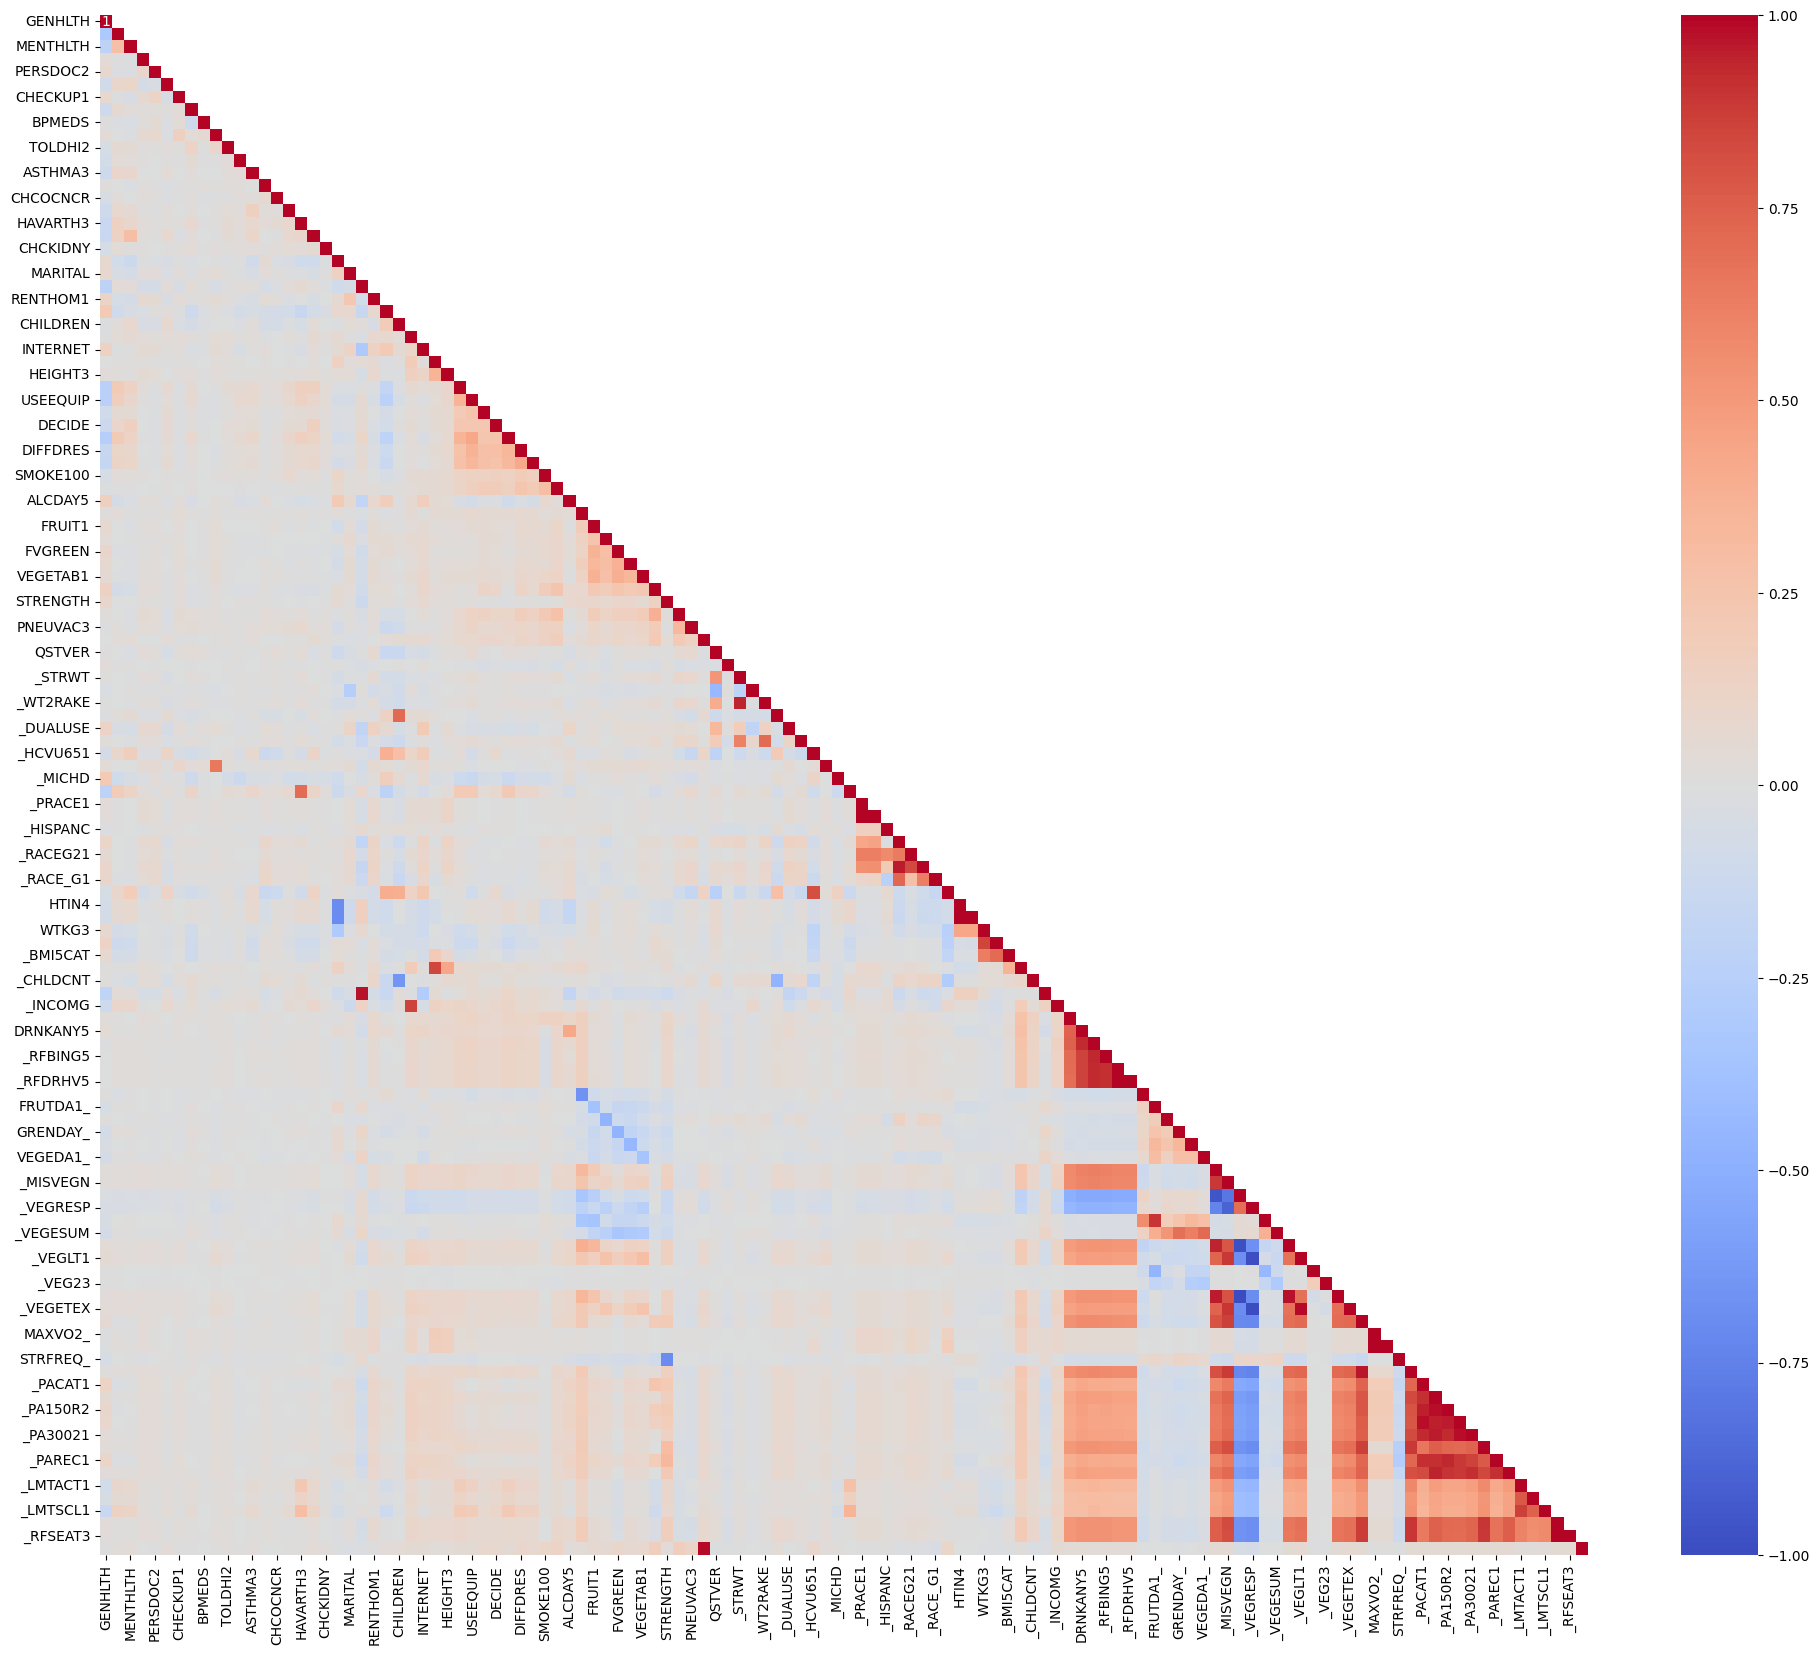

In [30]:
# Calculate the correlation matrix of the dataframe (correlation coefficients between variables)
matriz_correlacion = data_cleaned2.corr()

# Create a mask to hide the upper triangular part excluding the diagonal
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool), k=1)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(24, 20))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.show()

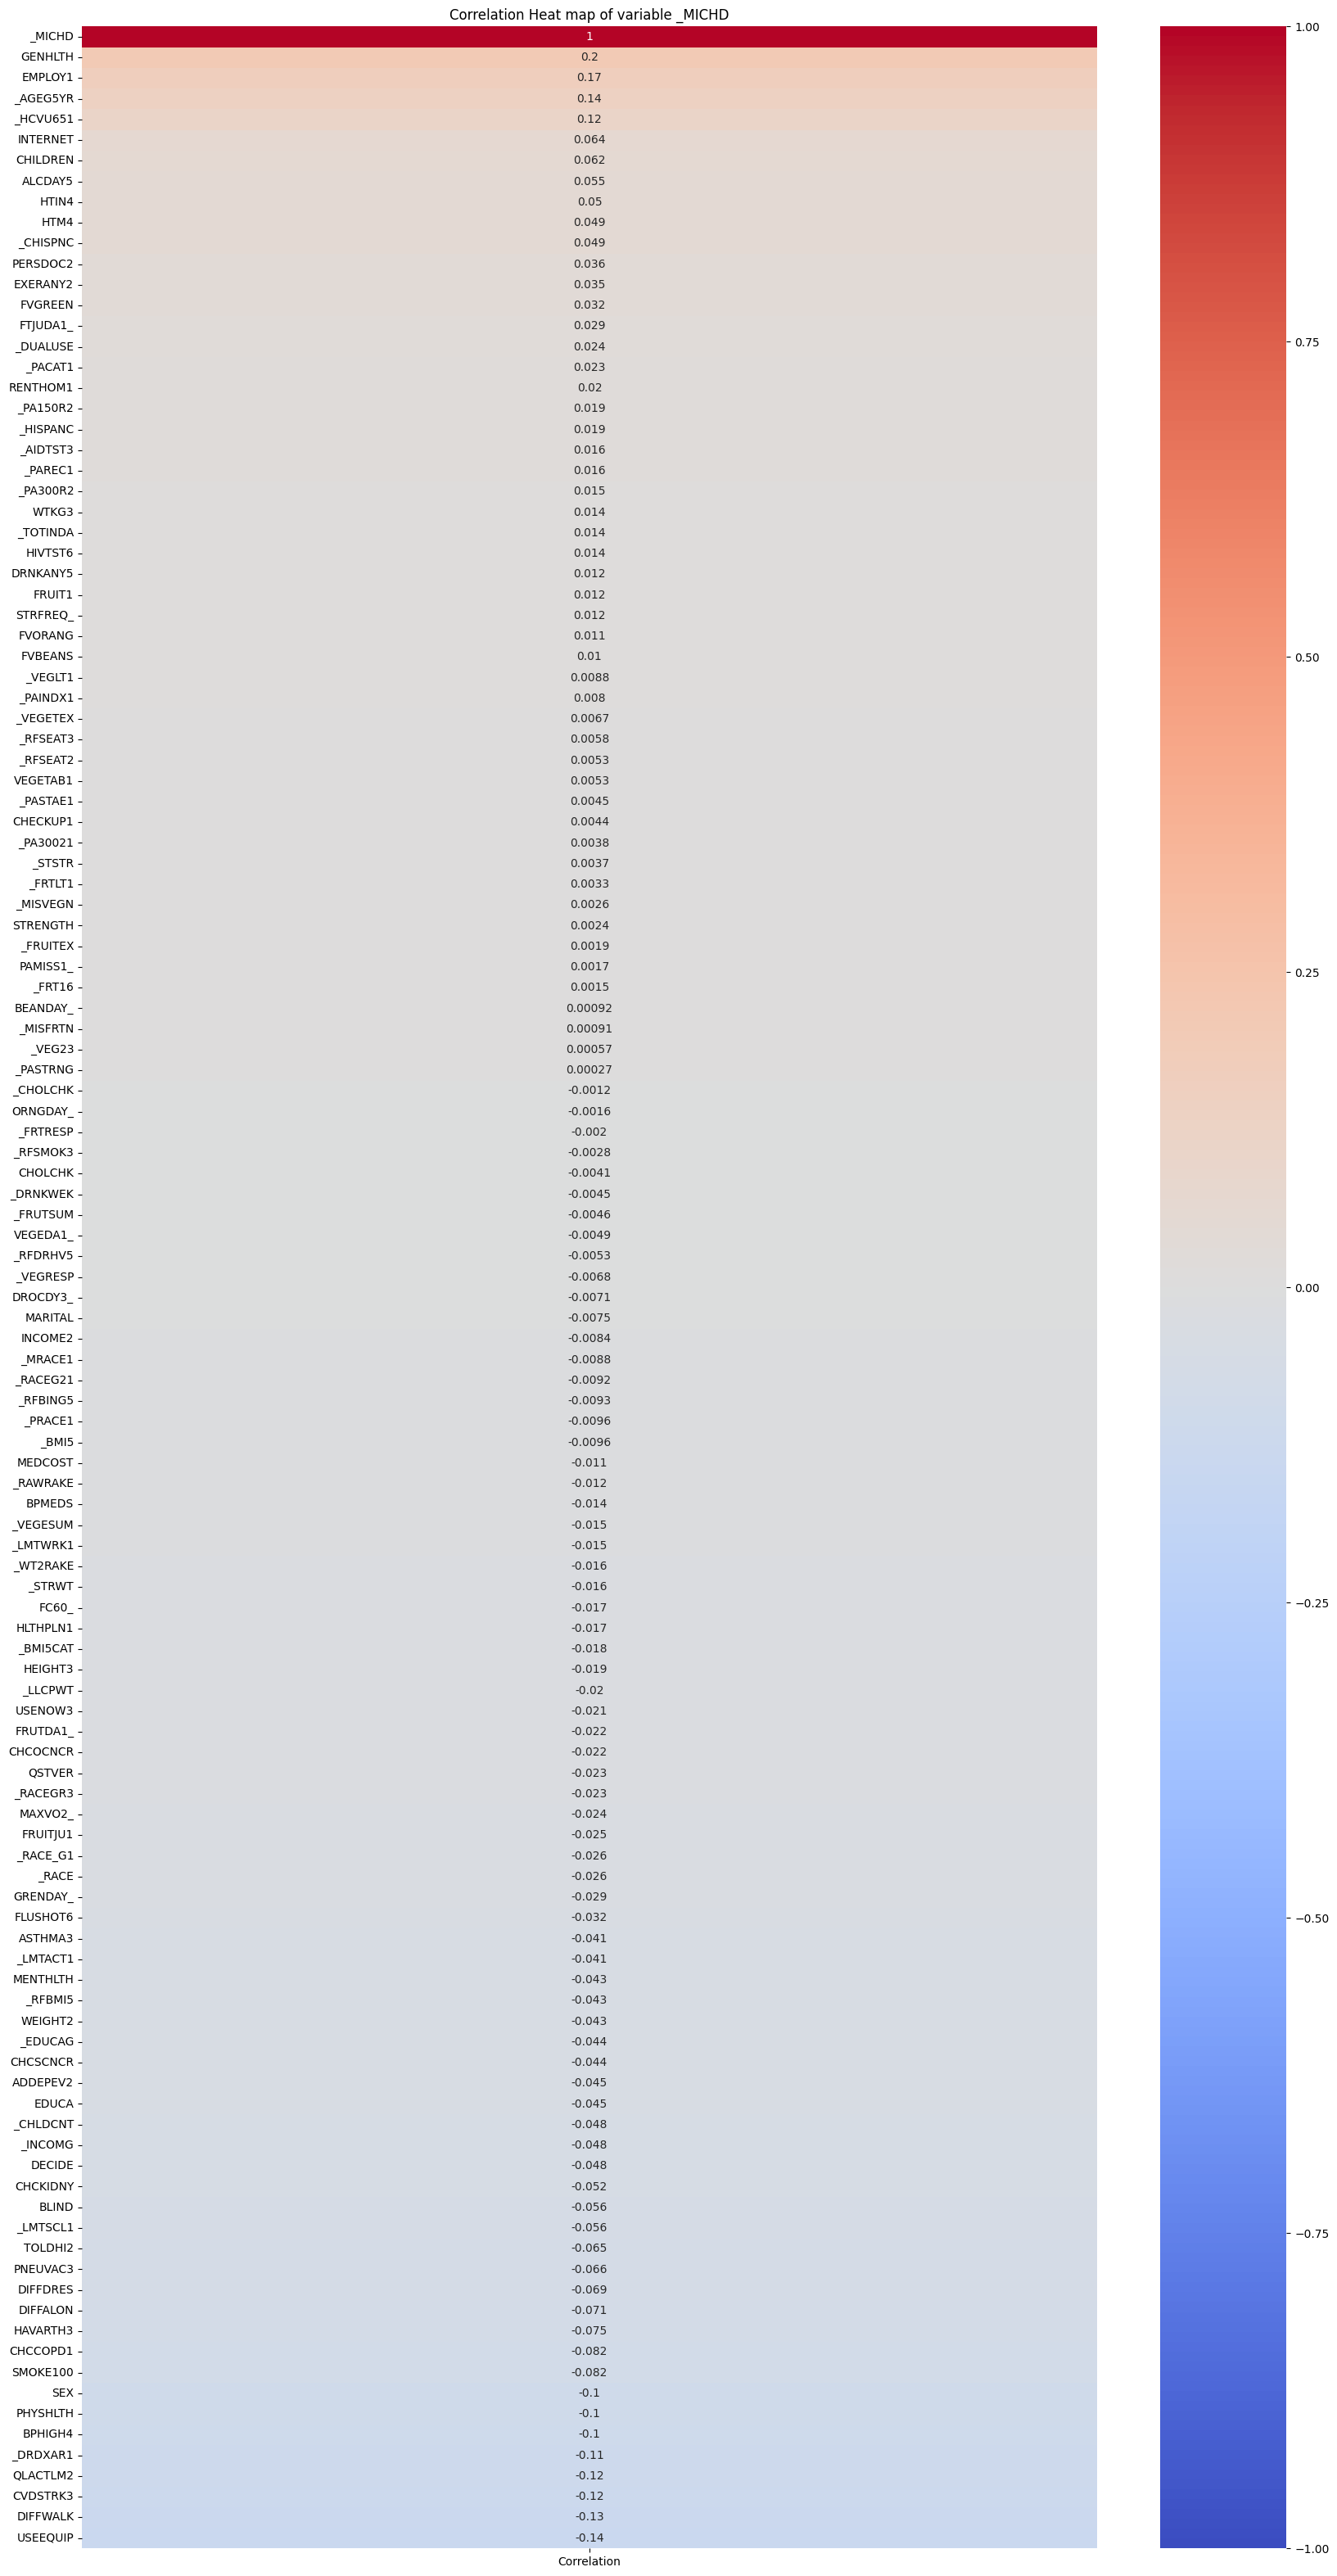

In [31]:
# Calculate the correlations of the variable of interest with all other variables
correlations = data_cleaned2.corrwith(data_cleaned2['_MICHD']).sort_values(ascending=False)

# Create a DataFrame with the correlations.
df_correlations = pd.DataFrame(correlations, columns=['Correlation'])

# Plot the heat map
plt.figure(figsize=(20, 40))
sns.heatmap(df_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heat map of variable _MICHD')
plt.show()

**Most correlated variables with target variable**

In [32]:
significant_correlations = df_correlations[df_correlations['Correlation'].abs() > 0.05]
selected_features_correlations = list(significant_correlations.index)

print(significant_correlations)
print("")
print(f'Final Selected features (long {len(selected_features_correlations)}):')
print(selected_features_correlations)

          Correlation
_MICHD       1.000000
GENHLTH      0.204409
EMPLOY1      0.165788
_AGEG5YR     0.142544
_HCVU651     0.115407
INTERNET     0.063814
CHILDREN     0.061505
ALCDAY5      0.054508
HTIN4        0.050392
CHCKIDNY    -0.051578
BLIND       -0.055544
_LMTSCL1    -0.055812
TOLDHI2     -0.065228
PNEUVAC3    -0.065921
DIFFDRES    -0.069384
DIFFALON    -0.070646
HAVARTH3    -0.074956
CHCCOPD1    -0.081536
SMOKE100    -0.081707
SEX         -0.100345
PHYSHLTH    -0.100656
BPHIGH4     -0.102554
_DRDXAR1    -0.109827
QLACTLM2    -0.116017
CVDSTRK3    -0.121215
DIFFWALK    -0.125712
USEEQUIP    -0.135473

Final Selected features (long 27):
['_MICHD', 'GENHLTH', 'EMPLOY1', '_AGEG5YR', '_HCVU651', 'INTERNET', 'CHILDREN', 'ALCDAY5', 'HTIN4', 'CHCKIDNY', 'BLIND', '_LMTSCL1', 'TOLDHI2', 'PNEUVAC3', 'DIFFDRES', 'DIFFALON', 'HAVARTH3', 'CHCCOPD1', 'SMOKE100', 'SEX', 'PHYSHLTH', 'BPHIGH4', '_DRDXAR1', 'QLACTLM2', 'CVDSTRK3', 'DIFFWALK', 'USEEQUIP']


**Boxplots and violin plots**

In [33]:
# categoric with numeric
def plots(feature):
    # Violin Plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='_MICHD', y=feature, data=data_cleaned2, palette=["green", "red"])
    plt.title(f'Violin plot of {feature} per _MICHD')
    plt.show()

**Very correlated feature**

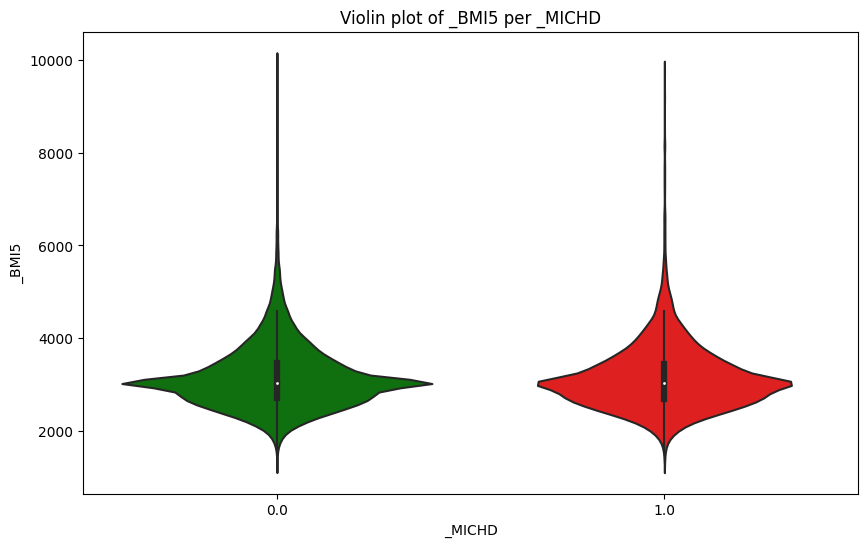

In [34]:
plots('_BMI5')

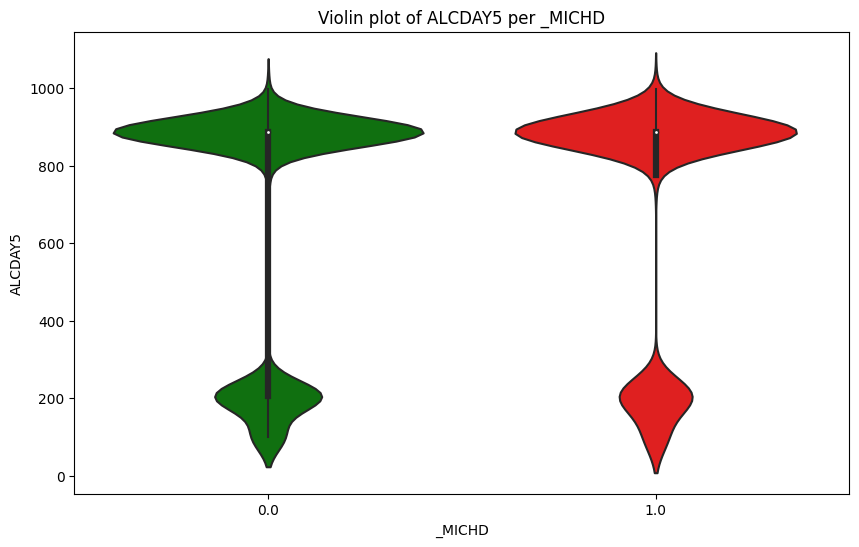

In [35]:
plots('ALCDAY5')

**Poorly correlated feature**

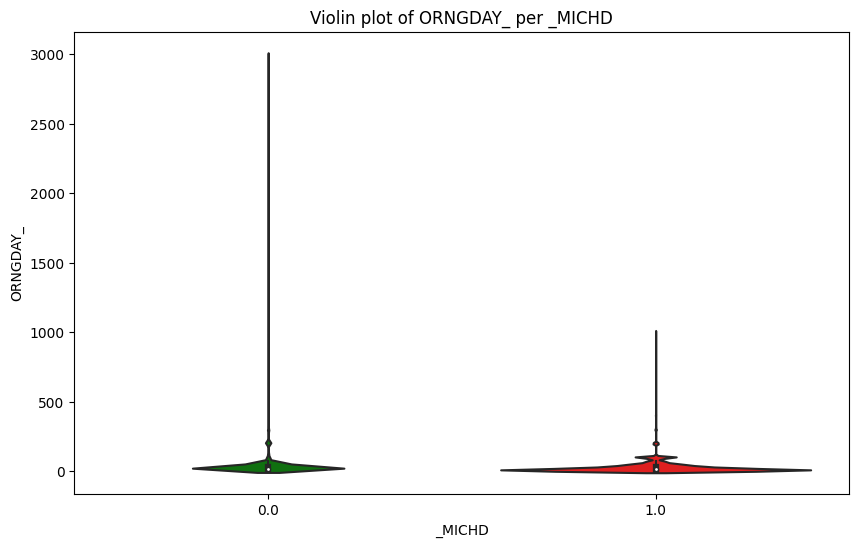

In [36]:
plots('ORNGDAY_')

------

## **DATA BALANCING**

**Variable CHD distribution before balancing**

In [37]:
data_cleaned2.groupby(['_MICHD']).size()

_MICHD
0.0    42910
1.0    12451
dtype: int64

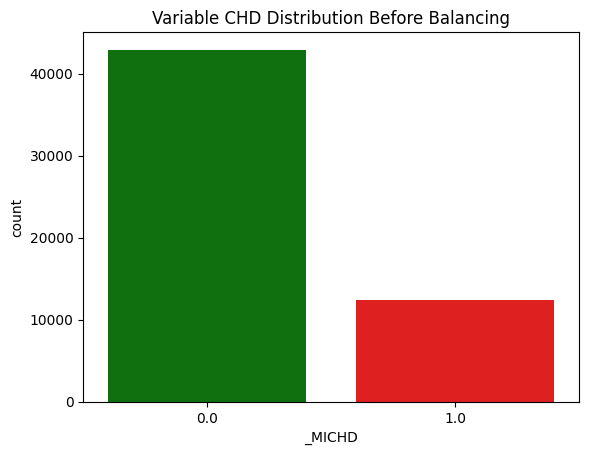

In [38]:
sns.countplot(x='_MICHD', data=data_cleaned2, palette=["green", "red"])
plt.title('Variable CHD Distribution Before Balancing')
plt.show()

### **Balancing with DOWN SAMPLING**

In [39]:
# Separate the DataFrame in two based on the classes
df_majority = data_cleaned2[data_cleaned2._MICHD == 0]
df_minority = data_cleaned2[data_cleaned2._MICHD == 1]

# Downsampling of the majority class
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)  # Equal the number of samples to the minority class.

# Combining the minority class with the downsampled majority class
df_balanced_ds = pd.concat([df_majority_downsampled, df_minority])

# Shuffle rows so that they are not grouped by class
df_balanced_ds = df_balanced_ds.sample(frac=1, random_state=42).reset_index(drop=True)

**Variable CHD distribution after balancing**

In [40]:
df_balanced_ds.groupby(['_MICHD']).size()

_MICHD
0.0    12451
1.0    12451
dtype: int64

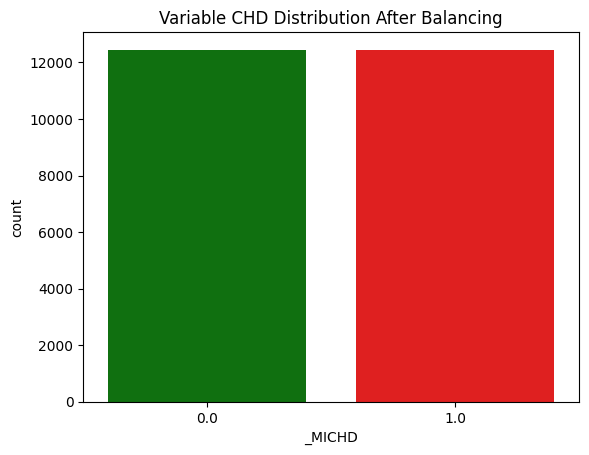

In [41]:
sns.countplot(x='_MICHD', data=df_balanced_ds, palette=["green", "red"])
plt.title('Variable CHD Distribution After Balancing')
plt.show()

**Export balanced dataset**

In [42]:
# Export clean dataset to CSV
df_balanced_ds.to_csv("dataset_balanced_ds.csv", index=False)

### **Balancing with UP SAMPLING**

In [43]:
# Separate the DataFrame in two based on the classes
df_majority = data_cleaned2[data_cleaned2._MICHD == 0]
df_minority = data_cleaned2[data_cleaned2._MICHD == 1]

# Up sampling of the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sampling with replacement
                                 n_samples=len(df_majority),     # Equal the number of samples to that of the majority class
                                 random_state=42)  # For reproducibility

# Combining the majority class with the minority class upsampled
df_balanced_us = pd.concat([df_majority, df_minority_upsampled])

# Shuffle rows so that they are not grouped by class
df_balanced_us = df_balanced_us.sample(frac=1, random_state=42).reset_index(drop=True)

**Variable CHD distribution after balancing**

In [44]:
df_balanced_us.groupby(['_MICHD']).size()

_MICHD
0.0    42910
1.0    42910
dtype: int64

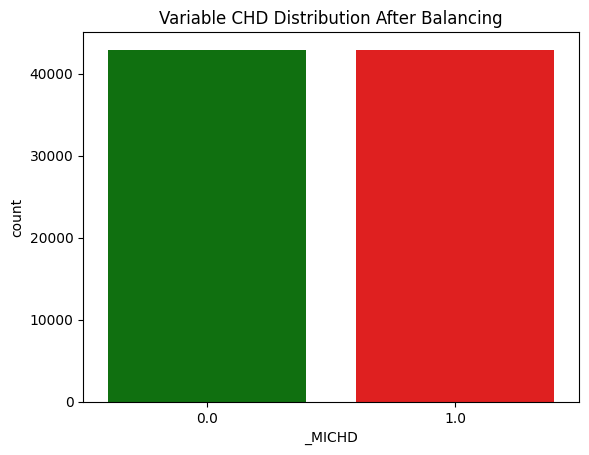

In [45]:
sns.countplot(x='_MICHD', data=df_balanced_us, palette=["green", "red"])
plt.title('Variable CHD Distribution After Balancing')
plt.show()

**Export balanced dataset**

In [46]:
# Export clean dataset to CSV
df_balanced_us.to_csv("dataset_balanced_us.csv", index=False)

### **Balancing with SMOTE**

In [47]:
# Separate characteristics (X) and label (y)
X = data_cleaned2.drop('_MICHD', axis=1)  # Asume que '_MICHD' es tu etiqueta
y = data_cleaned2['_MICHD']

# Initialize SMOTE and balance the data
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

# X_res and y_res are now balanced. You can combine them again in a new DataFrame if necessary.
df_balanced_smote = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res, columns=['_MICHD'])], axis=1)

**Variable CHD distribution after balancing**

In [48]:
df_balanced_smote.groupby(['_MICHD']).size()
# TO DO ->>> deberia ser una mezcla de US y DS

_MICHD
0.0    42910
1.0    42910
dtype: int64

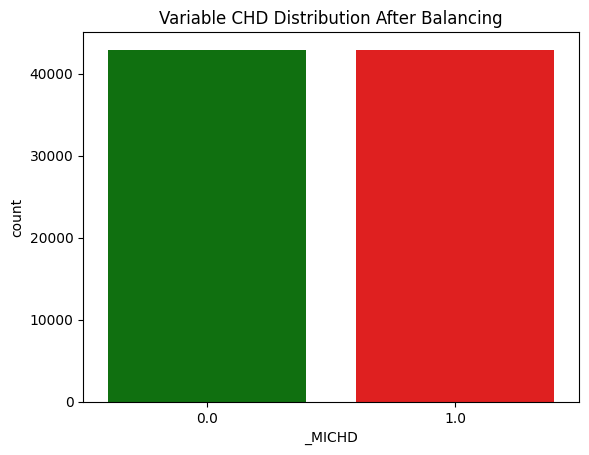

In [49]:
sns.countplot(x='_MICHD', data=df_balanced_smote, palette=["green", "red"])
plt.title('Variable CHD Distribution After Balancing')
plt.show()

**Export balanced dataset**

In [50]:
# Export clean dataset to CSV
df_balanced_smote.to_csv("dataset_balanced_smote.csv", index=False)

----

## **FEATURE SELECTION for the modelos**

### **Manual selection**

**We select variables according to medical criteria**

In [51]:
"""
# select specific columns
brfss_df_selected = df_balanced[['_RFHYPE5',  'TOLDHI2', '_CHOLCHK', '_BMI5', 'SMOKE100', 'CVDSTRK3', '_MICHD', '_TOTINDA', '_FRTLT1', '_VEGLT1', '_RFDRHV5', 'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2', '_LTASTH1']]
"""

"\n# select specific columns\nbrfss_df_selected = df_balanced[['_RFHYPE5',  'TOLDHI2', '_CHOLCHK', '_BMI5', 'SMOKE100', 'CVDSTRK3', '_MICHD', '_TOTINDA', '_FRTLT1', '_VEGLT1', '_RFDRHV5', 'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2', '_LTASTH1']]\n"

**We adjust selected variables to facilitate models**

In [52]:
"""
#1 _RFHYPE5
#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
brfss_df_selected['_RFHYPE5'] = brfss_df_selected['_RFHYPE5'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFHYPE5 != 9]
brfss_df_selected._RFHYPE5.unique()

#2 TOLDHI2
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['TOLDHI2'] = brfss_df_selected['TOLDHI2'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 9]
brfss_df_selected.TOLDHI2.unique()

#3 _CHOLCHK
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
brfss_df_selected['_CHOLCHK'] = brfss_df_selected['_CHOLCHK'].replace({3:0,2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._CHOLCHK != 9]
brfss_df_selected._CHOLCHK.unique()

#4 _BMI5 (no changes, just note that these are BMI * 100. So for example a BMI of 4018 is really 40.18)
brfss_df_selected['_BMI5'] = brfss_df_selected['_BMI5'].div(100).round(0)
brfss_df_selected._BMI5.unique()

#5 SMOKE100
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['SMOKE100'] = brfss_df_selected['SMOKE100'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 9]
brfss_df_selected.SMOKE100.unique()

#6 CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['CVDSTRK3'] = brfss_df_selected['CVDSTRK3'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 9]
brfss_df_selected.CVDSTRK3.unique()

#8 _TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
brfss_df_selected['_TOTINDA'] = brfss_df_selected['_TOTINDA'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._TOTINDA != 9]
brfss_df_selected._TOTINDA.unique()

#9 _FRTLT1
# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day 
# remove all dont knows and missing 9
brfss_df_selected['_FRTLT1'] = brfss_df_selected['_FRTLT1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._FRTLT1 != 9]
brfss_df_selected._FRTLT1.unique()

#10 _VEGLT1
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# remove all dont knows and missing 9
brfss_df_selected['_VEGLT1'] = brfss_df_selected['_VEGLT1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._VEGLT1 != 9]
brfss_df_selected._VEGLT1.unique()

#11 _RFDRHV5
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
brfss_df_selected['_RFDRHV5'] = brfss_df_selected['_RFDRHV5'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFDRHV5 != 9]
brfss_df_selected._RFDRHV5.unique()

#12 HLTHPLN1
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
brfss_df_selected['HLTHPLN1'] = brfss_df_selected['HLTHPLN1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.HLTHPLN1 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.HLTHPLN1 != 9]
brfss_df_selected.HLTHPLN1.unique()

#13 MEDCOST
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
brfss_df_selected['MEDCOST'] = brfss_df_selected['MEDCOST'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST != 9]
brfss_df_selected.MEDCOST.unique()

#14 GENHLTH
# This is an ordinal variable that I want to keep (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 9]
brfss_df_selected.GENHLTH.unique()

#15 MENTHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
brfss_df_selected['MENTHLTH'] = brfss_df_selected['MENTHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 99]
brfss_df_selected.MENTHLTH.unique()

#16 PHYSHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
brfss_df_selected['PHYSHLTH'] = brfss_df_selected['PHYSHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 99]
brfss_df_selected.PHYSHLTH.unique()

#17 DIFFWALK
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
brfss_df_selected['DIFFWALK'] = brfss_df_selected['DIFFWALK'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 9]
brfss_df_selected.DIFFWALK.unique()

#18 SEX
# in other words - is respondent male (somewhat arbitrarily chose this change because men are at higher risk for heart disease)
# change 2 to 0 (female as 0). Male is 1
brfss_df_selected['SEX'] = brfss_df_selected['SEX'].replace({2:0})
brfss_df_selected.SEX.unique()

#19 _AGEG5YR
# already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
brfss_df_selected = brfss_df_selected[brfss_df_selected._AGEG5YR != 14]
brfss_df_selected._AGEG5YR.unique()

#20 EDUCA
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
brfss_df_selected = brfss_df_selected[brfss_df_selected.EDUCA != 9]
brfss_df_selected.EDUCA.unique()

#21 INCOME2
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 99]
brfss_df_selected.INCOME2.unique()
"""

"\n#1 _RFHYPE5\n#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure\nbrfss_df_selected['_RFHYPE5'] = brfss_df_selected['_RFHYPE5'].replace({1:0, 2:1})\nbrfss_df_selected = brfss_df_selected[brfss_df_selected._RFHYPE5 != 9]\nbrfss_df_selected._RFHYPE5.unique()\n\n#2 TOLDHI2\n# Change 2 to 0 because it is No\n# Remove all 7 (dont knows)\n# Remove all 9 (refused)\nbrfss_df_selected['TOLDHI2'] = brfss_df_selected['TOLDHI2'].replace({2:0})\nbrfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 7]\nbrfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 9]\nbrfss_df_selected.TOLDHI2.unique()\n\n#3 _CHOLCHK\n# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years\n# Remove 9\nbrfss_df_selected['_CHOLCHK'] = brfss_df_selected['_CHOLCHK'].replace({3:0,2:0})\nbrfss_df_selected = brfss_df_selected[brfss_df_selected._CHOLCHK != 9]\nbrfss_df_selected._CHOLCHK.unique()\n\n#4 _BMI5 (no changes, just note that t

### **Statistical selection**

**By univariate characteristics (chi-square)**

In [53]:
# We assume that '_MICHD' is the target variable and is categorical/binary
X = df_balanced_us.drop(['_MICHD'], axis=1)  # Independent variables
y = df_balanced_us['_MICHD']  # Target variable

# Since chi2 needs positive values, we will scale the data to make sure they are all positive
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# We apply SelectKBest with chi2 to select the k best variables, for now we will choose 30 to see which are the most significant
k = 20
chi2_selector = SelectKBest(chi2, k=k)
X_kbest = chi2_selector.fit_transform(X_scaled, y)

# We identify the selected variables
selected_features = chi2_selector.get_support(indices=True)
selected_features_chi = X.columns[selected_features]
selected_features_chi = list(selected_features_chi)

print(f'Selected features by Chi-Square (long {len(selected_features_chi)}):')
print(selected_features_chi)

# Show the ranking of the selected variables with all relevant information.
# print(feature_info_sorted)

Selected features by Chi-Square (long 20):
['GENHLTH', 'PHYSHLTH', 'BPHIGH4', 'TOLDHI2', 'HAVARTH3', 'SEX', 'EMPLOY1', 'WEIGHT2', 'QLACTLM2', 'USEEQUIP', 'DIFFWALK', 'SMOKE100', 'ALCDAY5', 'PNEUVAC3', '_HCVU651', '_DRDXAR1', '_AGEG5YR', '_RFBMI5', '_CHLDCNT', '_INCOMG']


**By stepwise backward elimination method**

In [54]:
target_variable = '_MICHD'

# Define a significance level to keep the variable.
# For example, we can use a p-value of 0.05.
SL = 0.0001

# We assume that `df` is the DataFrame containing all selected variables and the target variable.
variables = df_balanced_us.columns.tolist()
variables.remove(target_variable)

# We start with all the variables
selected_features_backward = variables.copy()

# Loop to eliminate variables
while len(selected_features_backward) > 0:
    # Adjust the model
    X_train = df_balanced_us[selected_features_backward]
    X_train = sm.add_constant(X_train)  # Add the constant
    y_train = df_balanced_us[target_variable]
    model = sm.Logit(y_train, X_train).fit(disp=0)  # Adjust the model without printing output
    
    # Obtain the largest p-value of the variables in the model.
    max_p_value = model.pvalues.drop('const').max() # Ignore the constant
    
    if max_p_value > SL:
        # If the maximum p-value is greater than the significance level,
        # eliminate the corresponding variable.
        excluded_variable = model.pvalues.drop('const').idxmax()
        selected_features_backward.remove(excluded_variable)
    else:
        # If all variables have a p-value below the threshold, terminate the loop.
        break

print(f'\nSelected features by Stepwise Backward Elimination Method (long {len(selected_features_backward)}):')
print(selected_features_backward)


Selected features by Stepwise Backward Elimination Method (long 44):
['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PERSDOC2', 'BPHIGH4', 'BPMEDS', 'TOLDHI2', 'CVDSTRK3', 'ASTHMA3', 'CHCCOPD1', 'ADDEPEV2', 'CHCKIDNY', 'SEX', 'MARITAL', 'RENTHOM1', 'EMPLOY1', 'INCOME2', 'WEIGHT2', 'QLACTLM2', 'USEEQUIP', 'DIFFWALK', 'SMOKE100', 'ALCDAY5', 'FRUITJU1', 'FVBEANS', 'EXERANY2', 'PNEUVAC3', 'QSTVER', '_CHOLCHK', '_DRDXAR1', '_PRACE1', '_MRACE1', '_RACE_G1', '_BMI5', '_INCOMG', '_RFSMOK3', 'DRNKANY5', '_VEGESUM', 'MAXVO2_', 'FC60_', '_PACAT1', '_PA300R2', '_PAREC1', '_PASTAE1']


**By LASSO**

In [55]:
# Assuming that df_balanced is your DataFrame and '_MICHD' is your target variable
X = df_balanced_us.drop('_MICHD', axis=1).values
y = df_balanced_us['_MICHD'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define the pipeline with Lasso as a model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

# Define the range of alpha values for the grid search
alphas = np.arange(0.01, 5, 0.01)

# Perform grid search to find the best alpha value
search = GridSearchCV(pipeline,
                      {'model__alpha': alphas},
                      cv=5, scoring="neg_mean_squared_error", verbose=0
                      )

# Adjust the model
search.fit(X_train, y_train)

# Print the best parameters found
# print("Best parameteres:", search.best_params_)

# Obtain the coefficients of the best model found
coefficients = search.best_estimator_.named_steps['model'].coef_

# Calculate the importance of each characteristic based on the coefficients.
importance = np.abs(coefficients)

# Obtain the selected characteristics (those with coefficients different from zero).
selected_features_lasso = df_balanced_us.drop('_MICHD', axis=1).columns[importance > 0]
selected_features_lasso = list(selected_features_lasso)

# Obtain the unselected characteristics (those with coefficients equal to zero).
unselected_features_lasso = df_balanced_us.drop('_MICHD', axis=1).columns[importance == 0]

# Print selected and unselected characteristics
print(f'Selected features by LASSO (long {len(selected_features_lasso)}):')
print(selected_features_lasso)

Selected features by LASSO (long 27):
['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PERSDOC2', 'BPHIGH4', 'TOLDHI2', 'CVDSTRK3', 'ASTHMA3', 'CHCCOPD1', 'ADDEPEV2', 'CHCKIDNY', 'SEX', 'EMPLOY1', 'WEIGHT2', 'QLACTLM2', 'USEEQUIP', 'DIFFWALK', 'SMOKE100', 'ALCDAY5', 'EXERANY2', 'PNEUVAC3', '_DRDXAR1', '_RACE', '_RACE_G1', '_AGEG5YR', '_RFBMI5', 'MAXVO2_']


**Frequency of variable in Feature Selection methods**

In [56]:
# Combine lists
all_features = selected_features_correlations + selected_features_backward + selected_features_lasso

# Count the times of each feature in all lists
count = {}
for feature in all_features:
    if feature in count:
        count[feature] += 1
    else:
        count[feature] = 1

# Create the DataFrame from the dictionary
features_freq = pd.DataFrame(list(count.items()), columns=['Feature', 'Frequency'])

# Sort the DataFrame by frequency in descending order
features_freq.sort_values('Frequency', ascending=False, inplace=True)
features_freq

,Feature,Frequency
19,SEX,3
26,USEEQUIP,3
22,_DRDXAR1,3
18,SMOKE100,3
17,CHCCOPD1,3
23,QLACTLM2,3
24,CVDSTRK3,3
25,DIFFWALK,3
13,PNEUVAC3,3
12,TOLDHI2,3


##### **Select Final Features**

In [57]:
# Filter to obtain only the elements with a frequency greater than or equal to 3.
df_filtered = features_freq[features_freq['Frequency'] >= 3]

# Sort the filtered DataFrame by frequency in descending order
df_filtered = df_filtered.sort_values('Frequency', ascending=False)

# Convertimos los strings filtrados a una lista
final_features = df_filtered['Feature'].tolist()

# Convert the filtered strings to a list
print(df_filtered)
print("")
print(f'Final Selected features (long {len(final_features)}):')
print(final_features)

     Feature  Frequency
19       SEX          3
26  USEEQUIP          3
22  _DRDXAR1          3
18  SMOKE100          3
17  CHCCOPD1          3
23  QLACTLM2          3
24  CVDSTRK3          3
25  DIFFWALK          3
13  PNEUVAC3          3
12   TOLDHI2          3
20  PHYSHLTH          3
21   BPHIGH4          3
9   CHCKIDNY          3
1    GENHLTH          3
7    ALCDAY5          3
2    EMPLOY1          3

Final Selected features (long 16):
['SEX', 'USEEQUIP', '_DRDXAR1', 'SMOKE100', 'CHCCOPD1', 'QLACTLM2', 'CVDSTRK3', 'DIFFWALK', 'PNEUVAC3', 'TOLDHI2', 'PHYSHLTH', 'BPHIGH4', 'CHCKIDNY', 'GENHLTH', 'ALCDAY5', 'EMPLOY1']


**Export final dataset**

In [58]:
final_features.append('_MICHD')
final_df = df_balanced_us[final_features]
final_df

# TO DO ->>>>> Exportar 3 dataframes con balanceos

,SEX,USEEQUIP,_DRDXAR1,SMOKE100,CHCCOPD1,QLACTLM2,CVDSTRK3,DIFFWALK,PNEUVAC3,TOLDHI2,PHYSHLTH,BPHIGH4,CHCKIDNY,GENHLTH,ALCDAY5,EMPLOY1,_MICHD
0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,888.0,1.0,0.0
1,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,88.0,3.0,2.0,2.0,888.0,1.0,0.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,88.0,1.0,2.0,3.0,888.0,2.0,0.0
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,88.0,1.0,2.0,2.0,888.0,7.0,0.0
4,1.0,2.0,2.0,2.0,7.0,1.0,2.0,1.0,1.0,2.0,21.0,1.0,2.0,5.0,888.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85815,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,3.0,888.0,7.0,0.0
85816,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,206.0,1.0,1.0
85817,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,77.0,1.0,2.0,3.0,202.0,7.0,1.0
85818,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,88.0,1.0,2.0,3.0,888.0,3.0,0.0


In [59]:
# Export final dataset to CSV
final_df.to_csv("final_dataset.csv", index=False)

**Save features type**

In [60]:
# Assuming `data_cleaned2` is your DataFrame
dtype_dict = final_df.dtypes.apply(lambda x: x.name).to_dict()
dtype_dict

{'SEX': 'category',
 'USEEQUIP': 'category',
 '_DRDXAR1': 'category',
 'SMOKE100': 'category',
 'CHCCOPD1': 'category',
 'QLACTLM2': 'category',
 'CVDSTRK3': 'category',
 'DIFFWALK': 'category',
 'PNEUVAC3': 'category',
 'TOLDHI2': 'category',
 'PHYSHLTH': 'float64',
 'BPHIGH4': 'category',
 'CHCKIDNY': 'category',
 'GENHLTH': 'category',
 'ALCDAY5': 'float64',
 'EMPLOY1': 'category',
 '_MICHD': 'category'}

In [61]:
# PREGUNTAR ->> CUANDO HACER EL BALANCEO, ANTES O DESPUÉS DEL FEATURE SELECTION 

----

## **EXPLORATORY DATA ANALYSIS (after feature selection)**

**Read final dataset**

In [62]:
final_dataset = pd.read_csv('final_dataset.csv', dtype=dtype_dict)

**Correlation map**

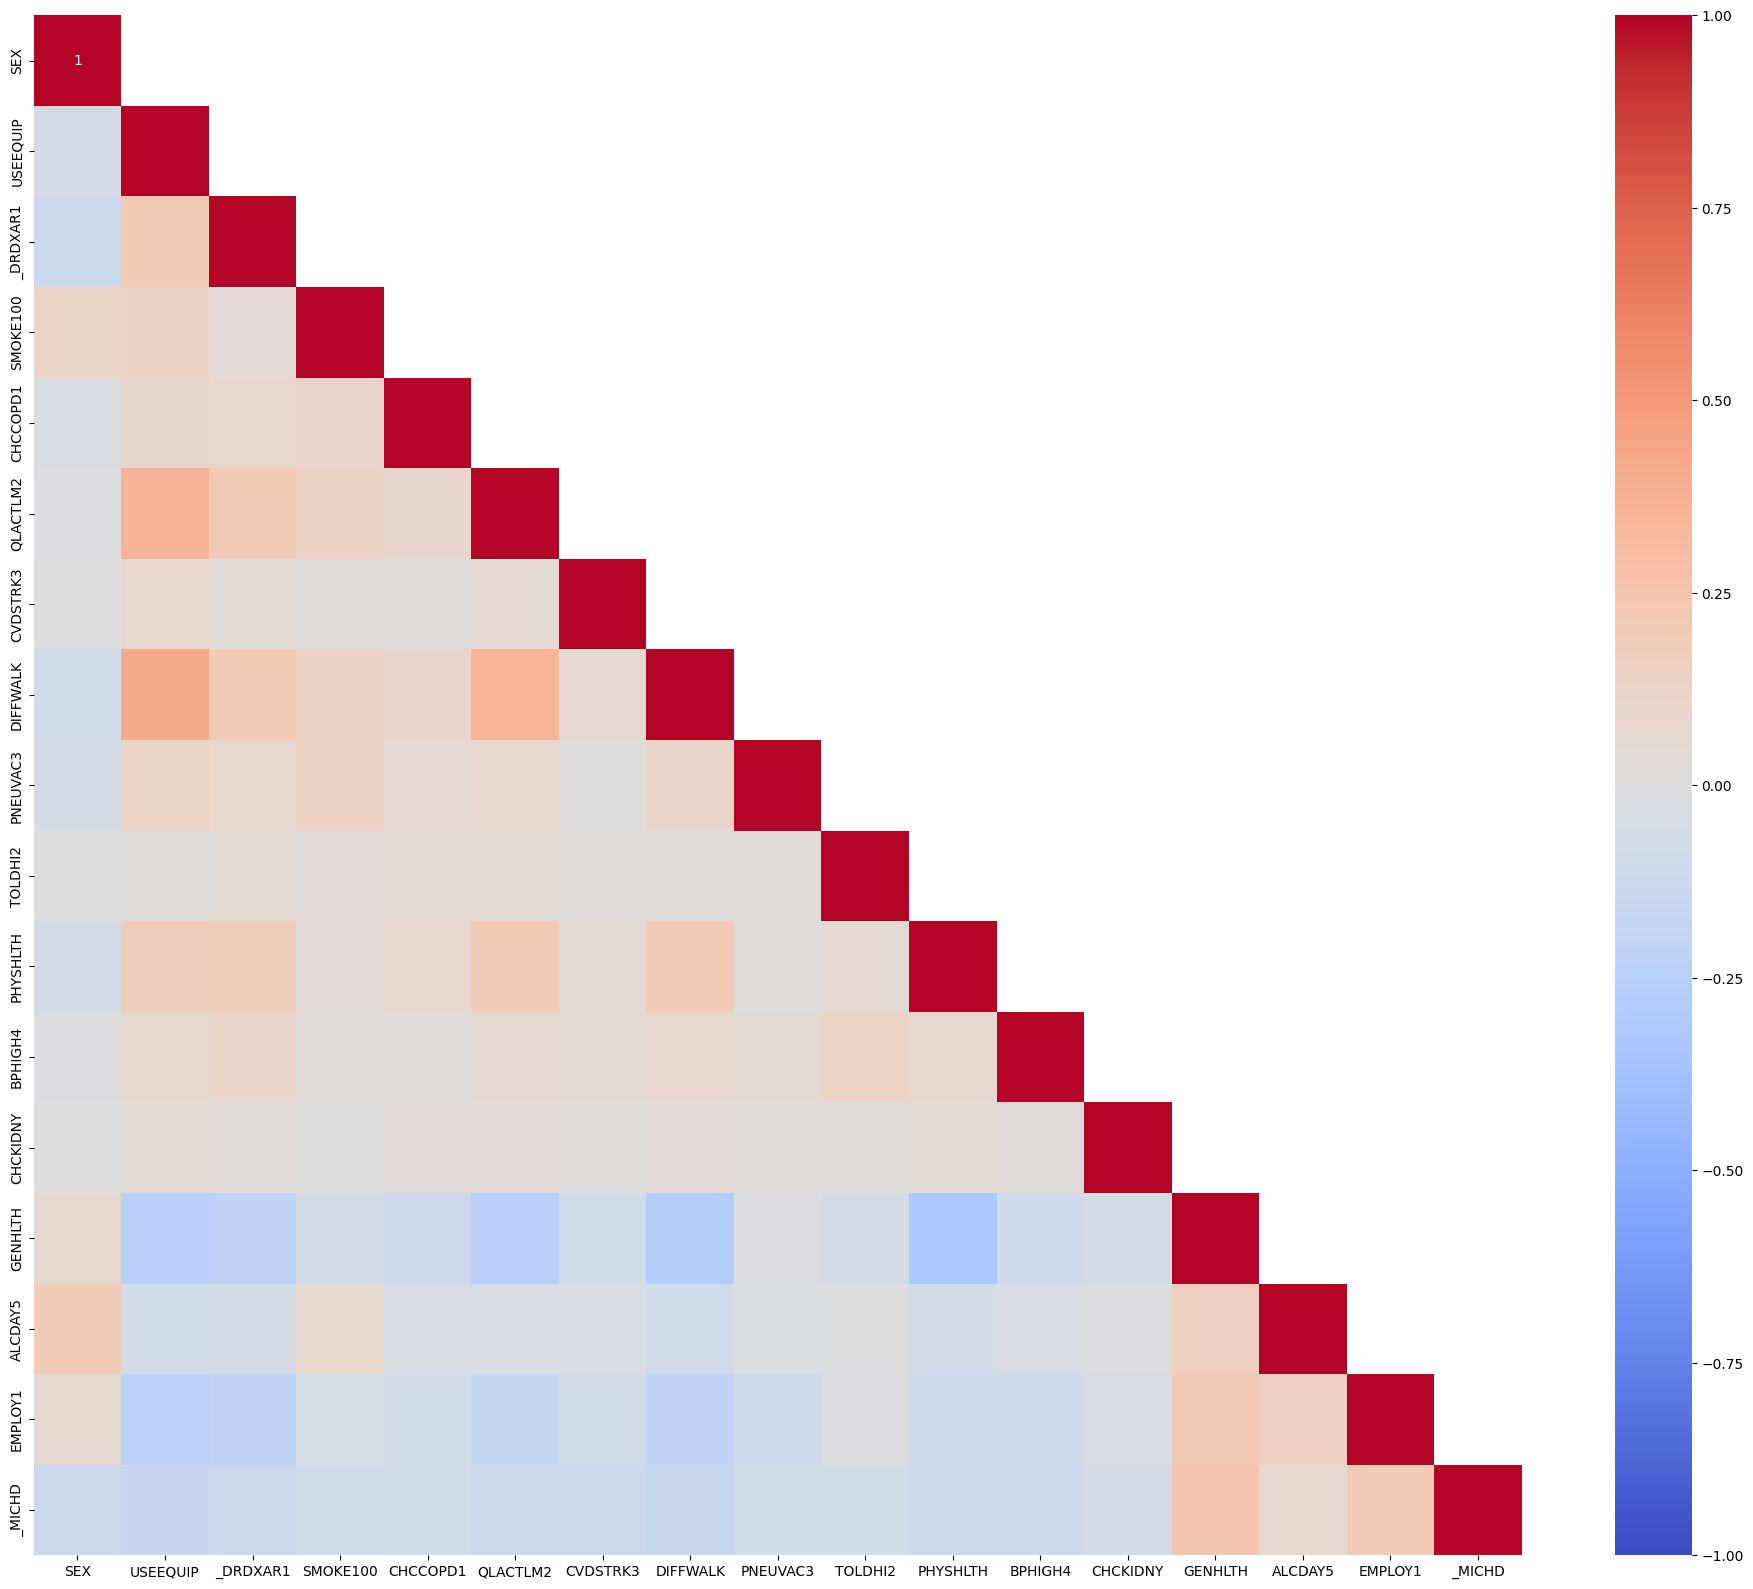

In [63]:
# Calculate the correlation matrix of the dataframe (correlation coefficients between variables)
matriz_correlacion = final_dataset.corr()

# Create a mask to hide the upper triangular part excluding the diagonal
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool), k=1)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(24, 20))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.show()

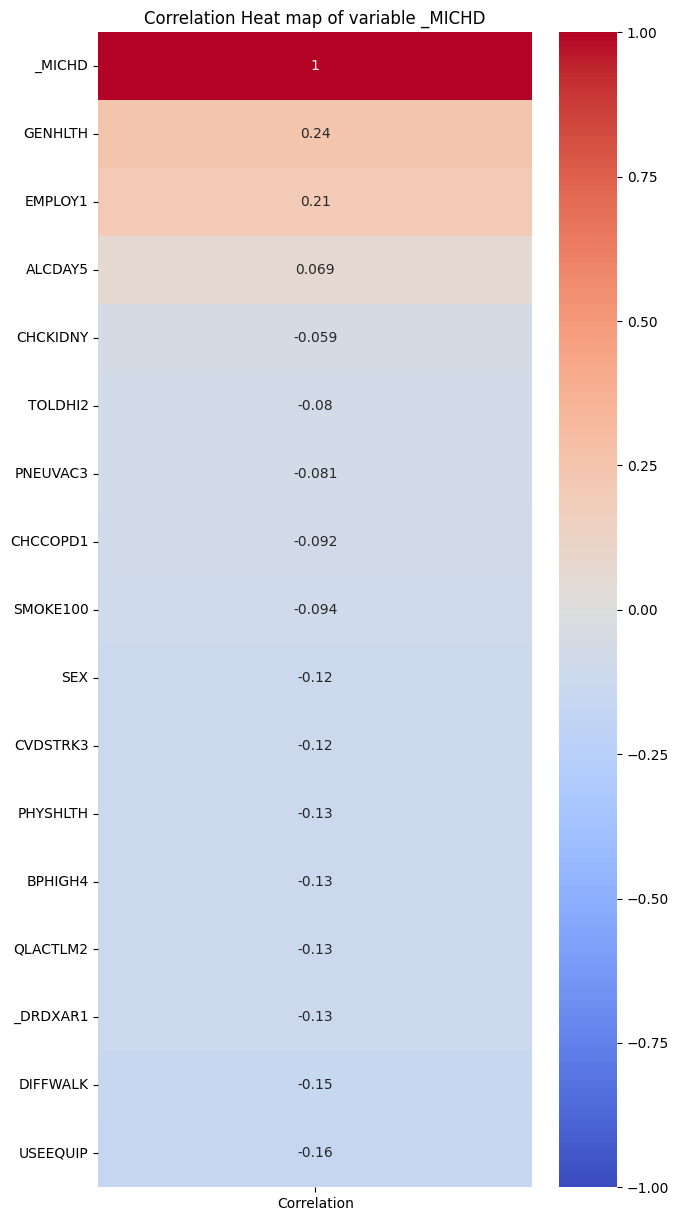

In [64]:
# Calculate the correlations of the variable of interest with all other variables
correlations = final_dataset.corrwith(final_dataset['_MICHD']).sort_values(ascending=False)

# Create a DataFrame with the correlations.
df_correlations = pd.DataFrame(correlations, columns=['Correlation'])

# Plot the heat map
plt.figure(figsize=(7, 15))
sns.heatmap(df_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heat map of variable _MICHD')
plt.show()

**Univariate analysis of features and target variable**

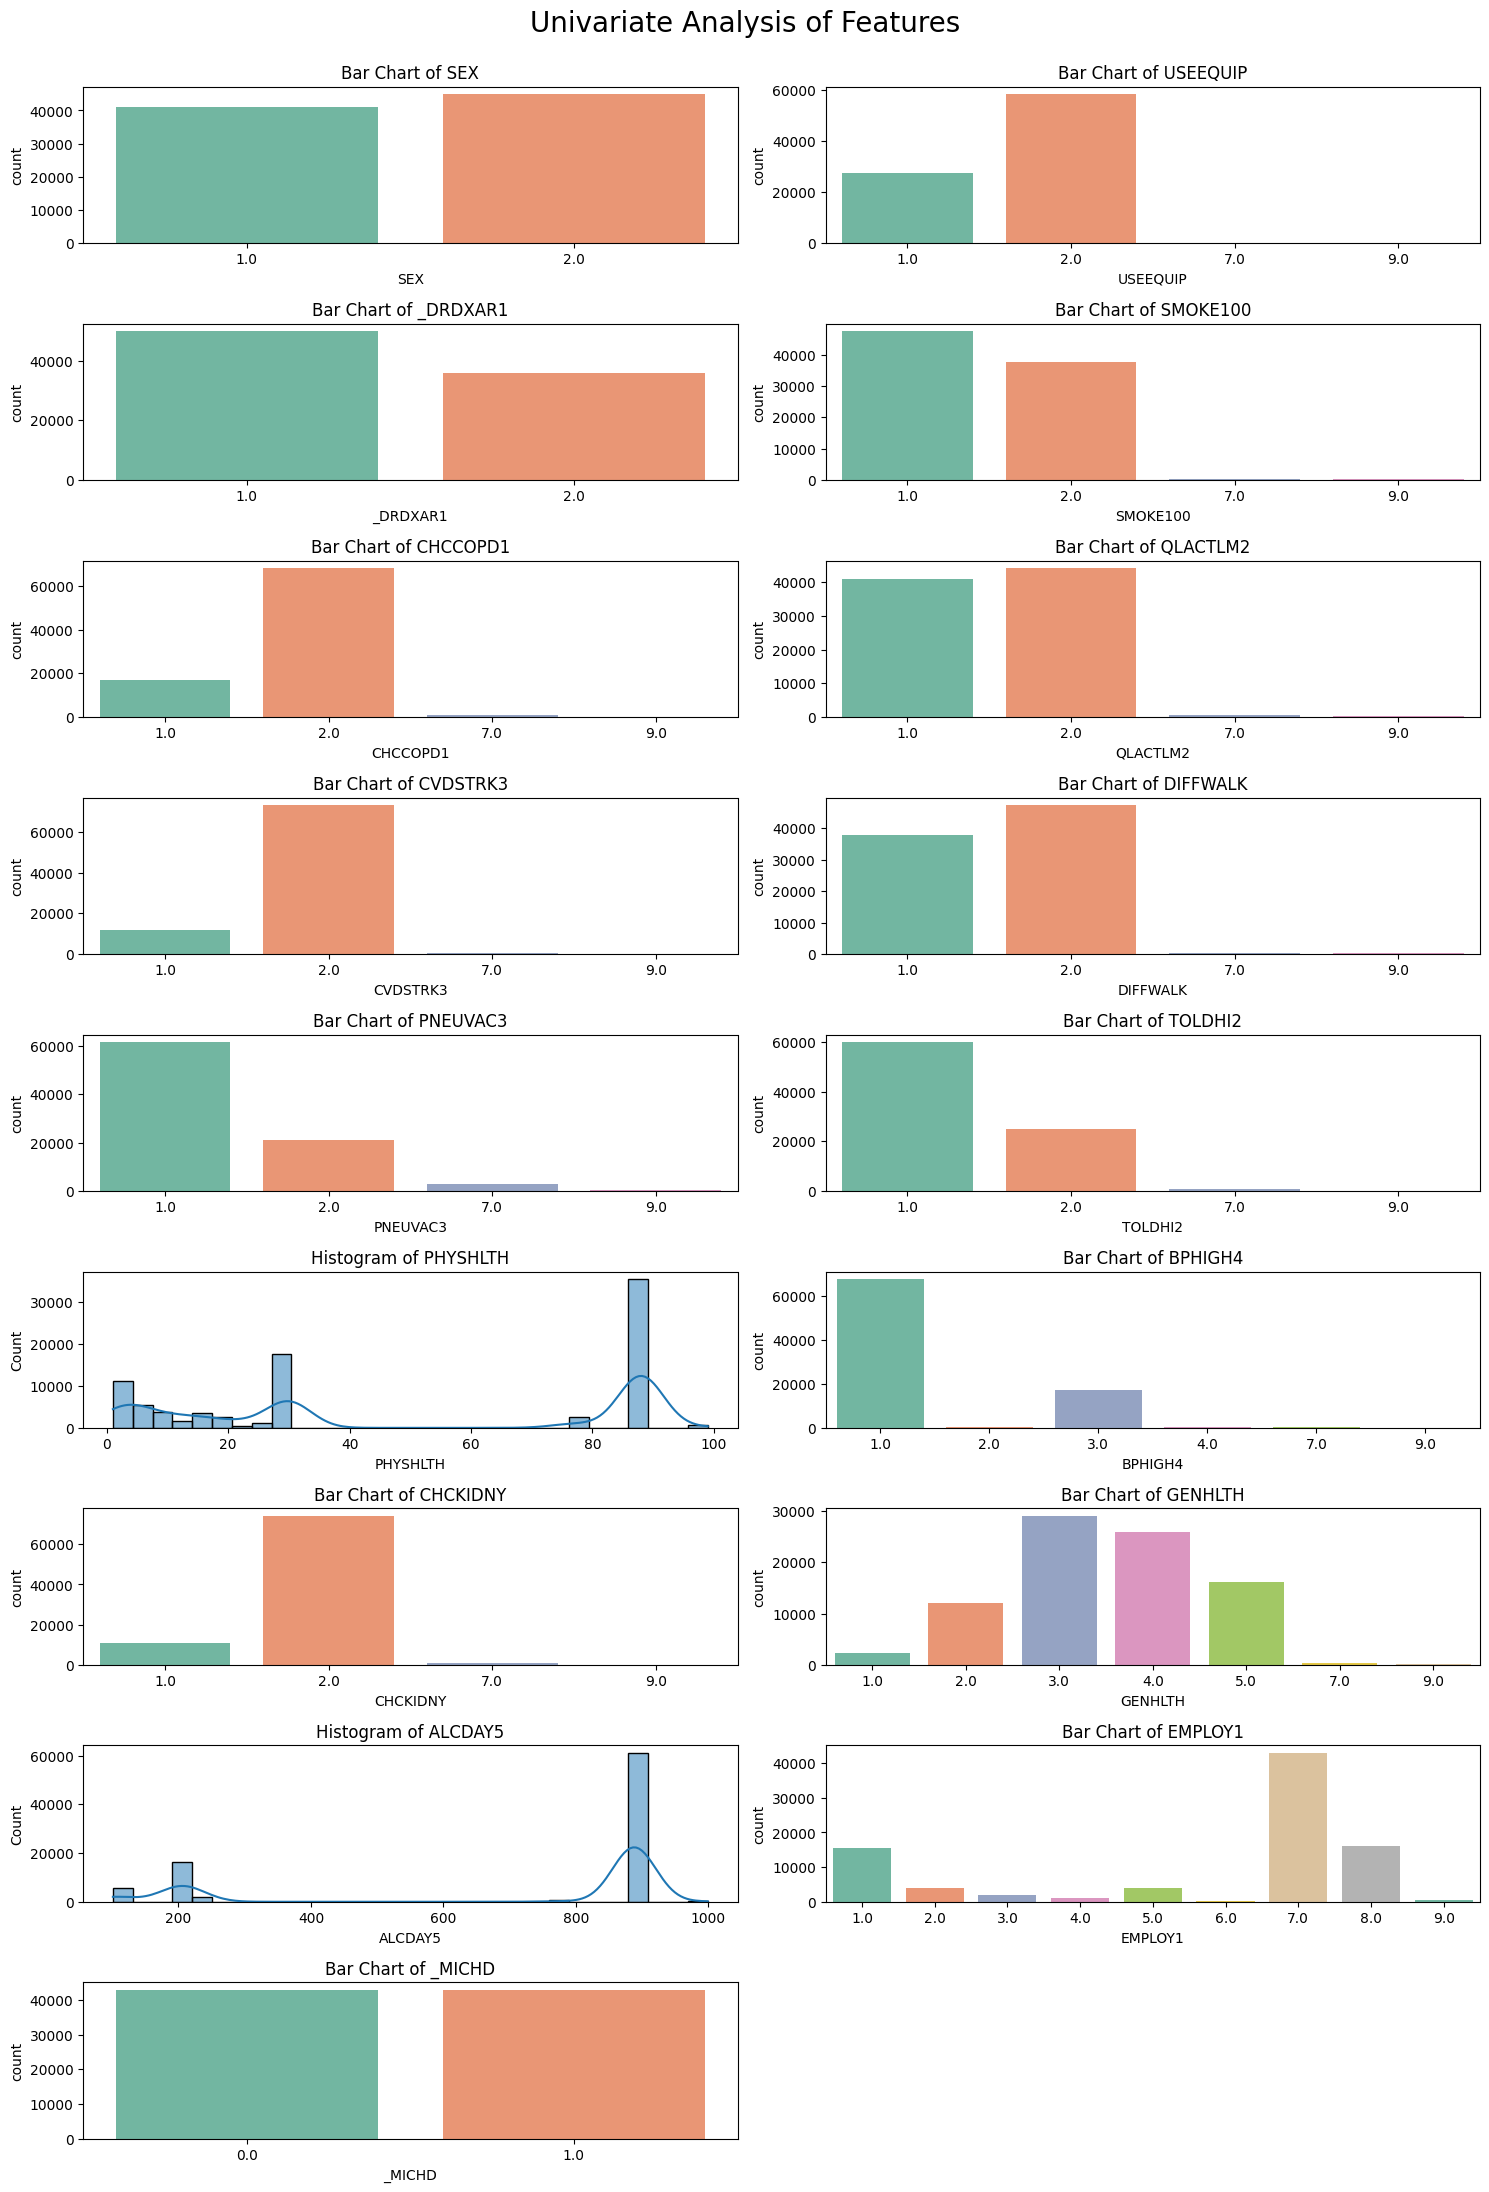

In [65]:
# Create a figure to contain the subcharts
plt.figure(figsize=(15, 40))

# Go through all the characteristics and create a graphic for each one.
for i, column in enumerate(final_features):
    plt.subplot(len(final_features), 2, i + 1)
    # Verify whether the column is numeric or categorical
    if pd.api.types.is_numeric_dtype(final_dataset[column]):
        # If numerical, draw a histogram
        sns.histplot(data=final_dataset, x=column, kde=True, bins=30)
        plt.title(f"Histogram of {column}")
    else:
        # If categorical, draw a bar chart.
        sns.countplot(data=final_dataset, x=column, palette="Set2")
        plt.title(f"Bar Chart of {column}")
    plt.tight_layout()

# Add a general title to the figure
plt.suptitle("Univariate Analysis of Features", fontsize=20, x=0.5, y=1.01)

# Show the figure
plt.show()

**Bivariate analysis of features with target variable**

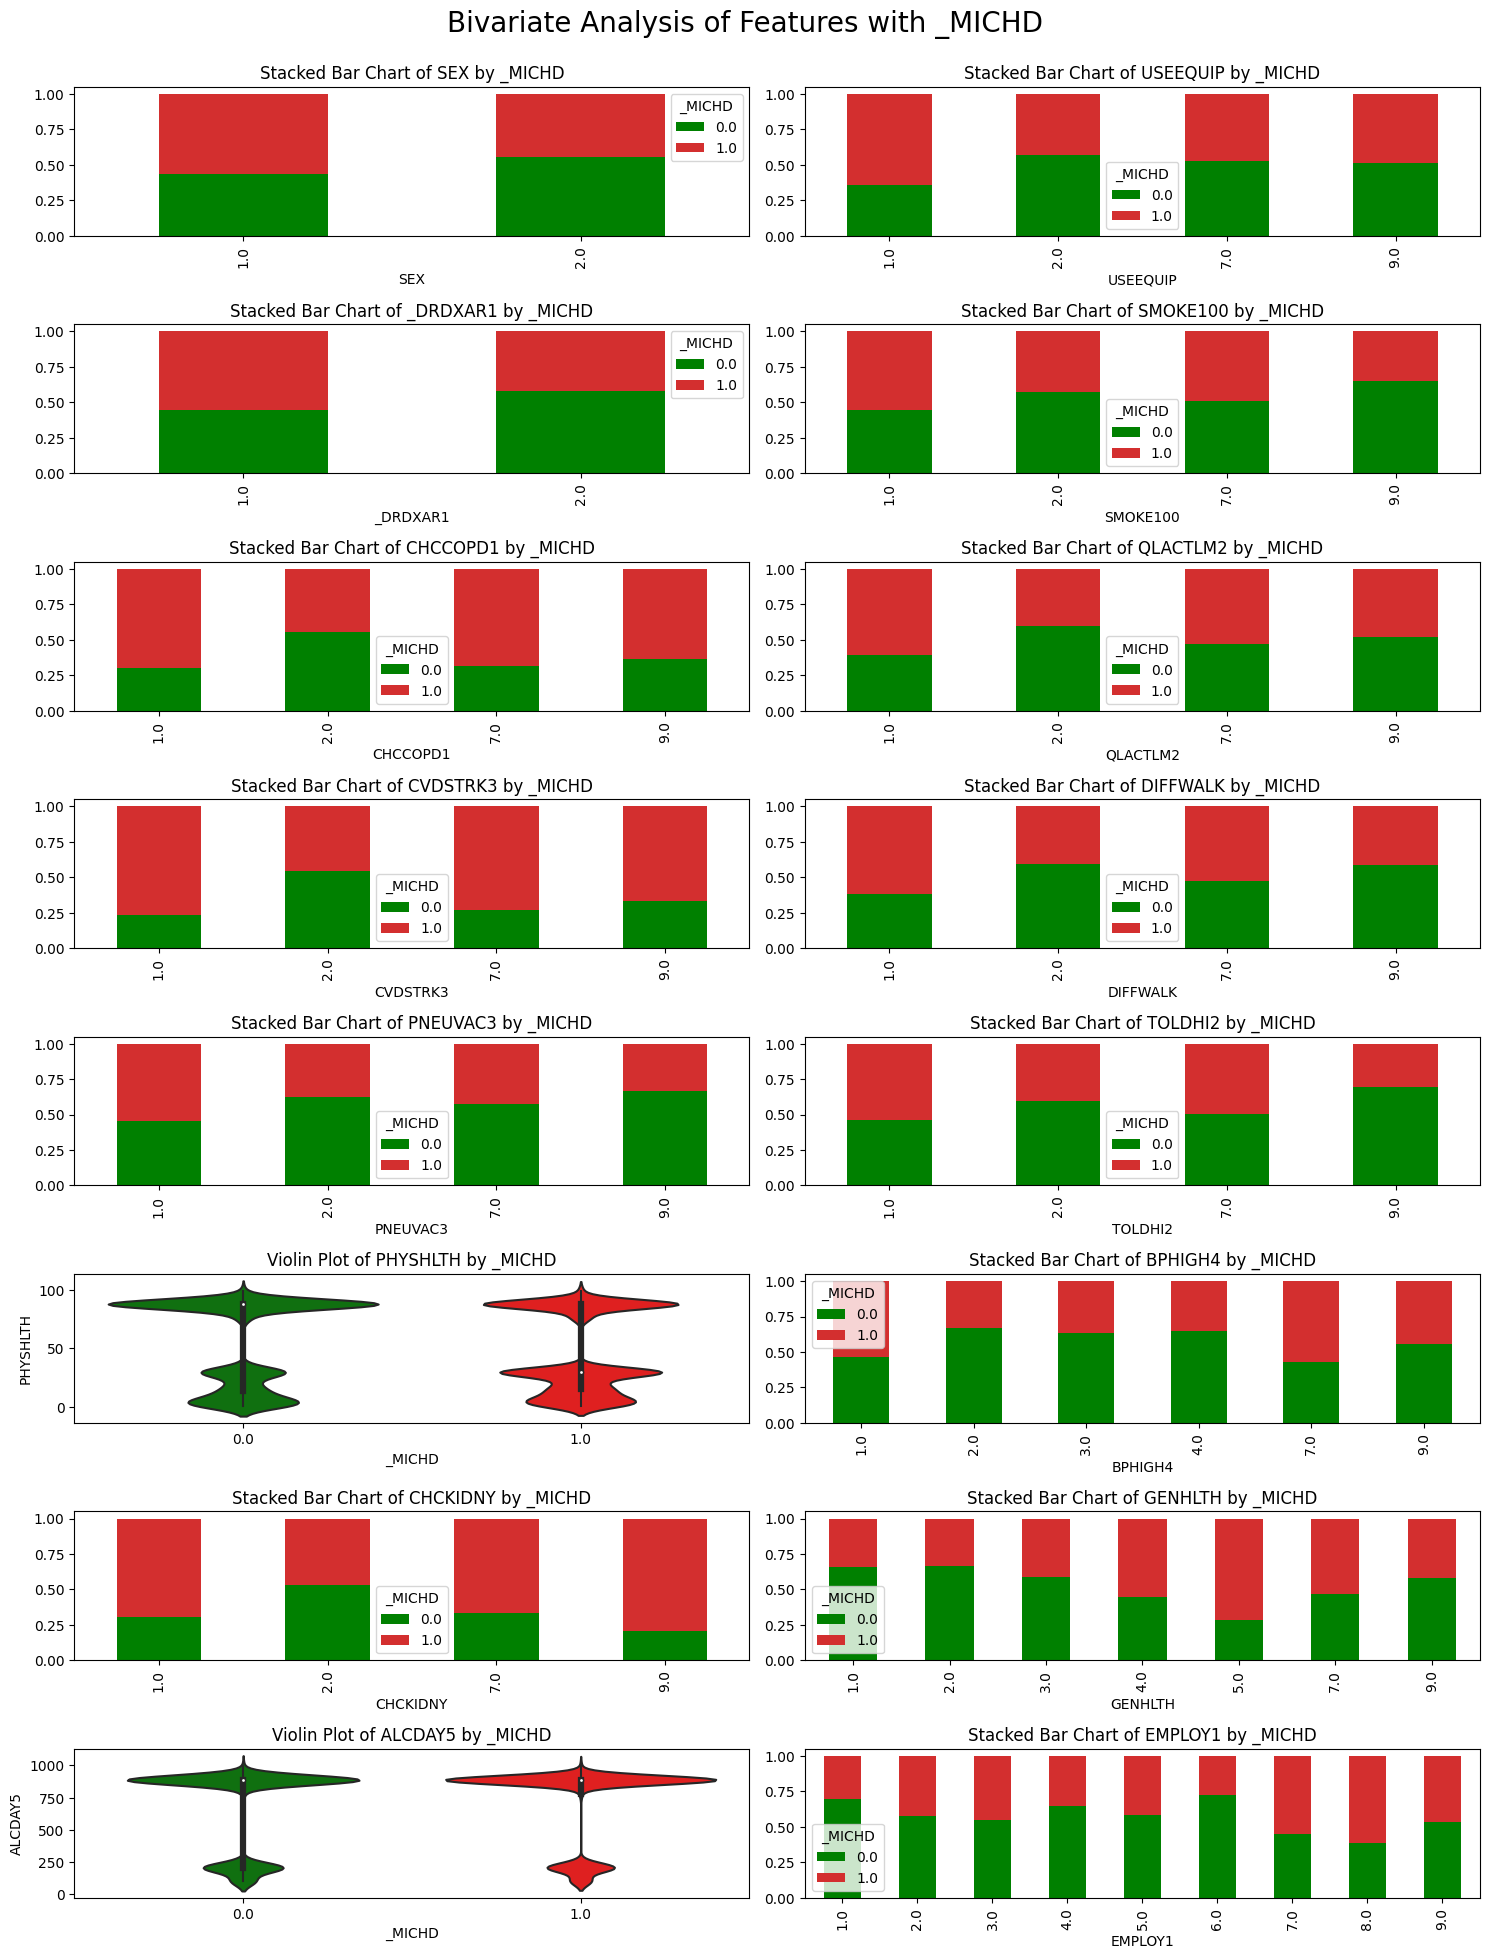

In [66]:
# Create a figure to contain the subcharts
plt.figure(figsize=(15, 40))

# Go through all the characteristics and create a graphic for each one.
for i, column in enumerate(final_features[0:16]):
    plt.subplot(len(final_features), 2, i + 1)
    
    # Verify whether the column is numeric or categorical
    if pd.api.types.is_numeric_dtype(final_dataset[column]):
        # If numerical, draw a violin diagram
        sns.violinplot(x='_MICHD', y=column, data=final_dataset, split=True, palette=['green', 'red'])
        plt.title(f"Violin Plot of {column} by _MICHD")
    else:
        # If categorical, draw a stacked bar chart.
        # For the stacked bar chart, a cross DataFrame is first created.
        crosstab = pd.crosstab(final_dataset[column], final_dataset['_MICHD'], normalize='index')
        crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['green', '#D32F2F'])
        plt.title(f"Stacked Bar Chart of {column} by _MICHD")
    
    plt.tight_layout()

# Add a general title to the figure
plt.suptitle("Bivariate Analysis of Features with _MICHD", fontsize=20, x=0.5, y=1.01)

# Show the figure
plt.show()

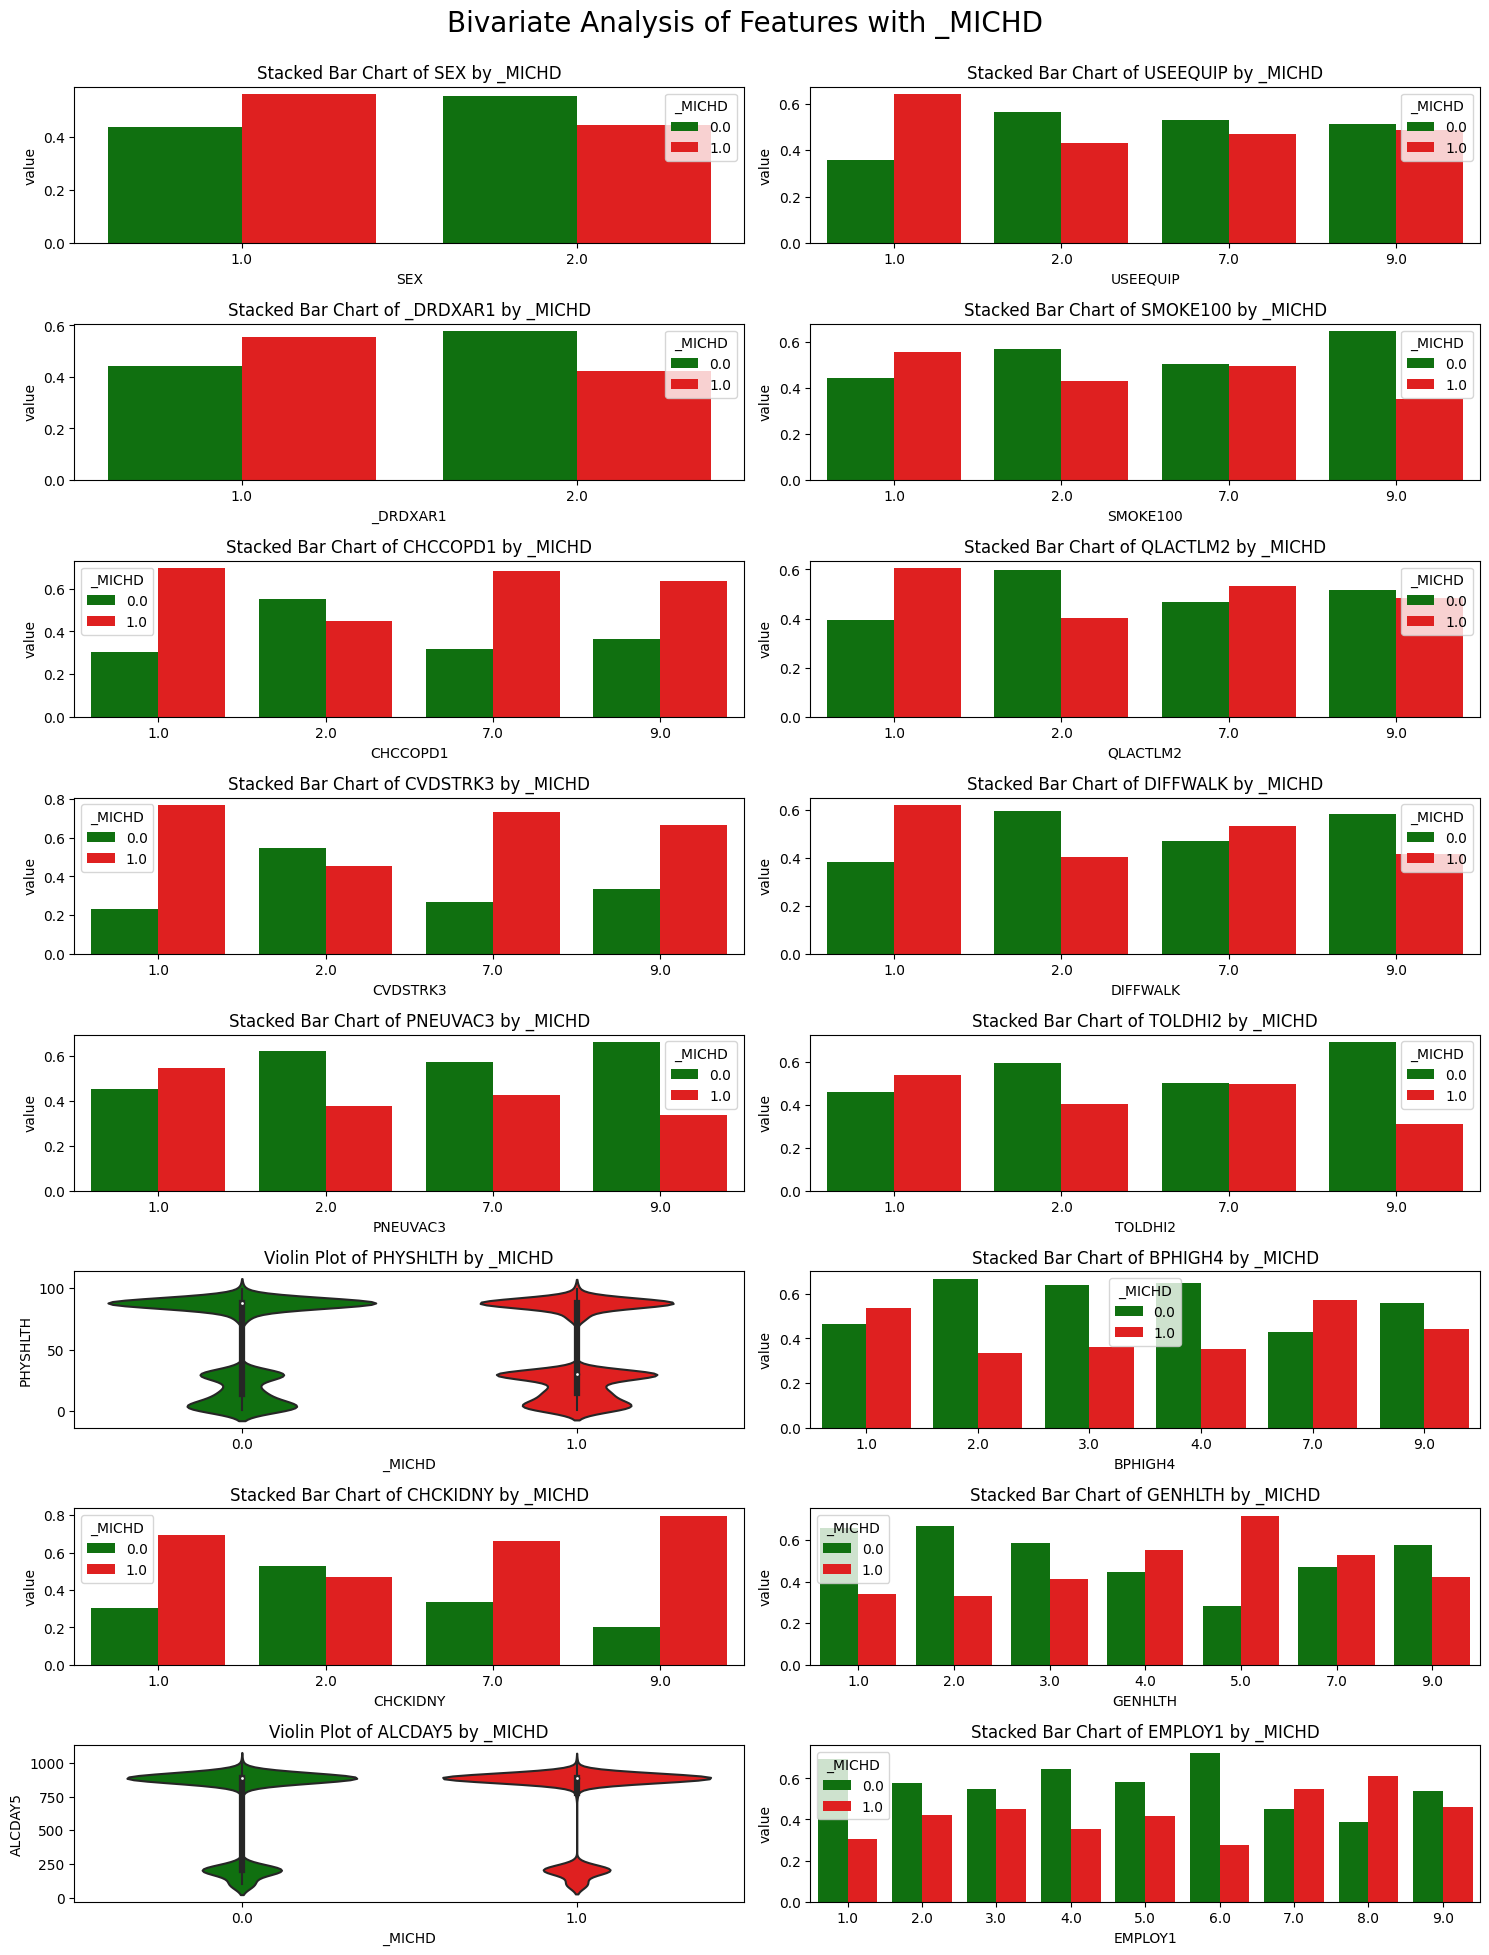

In [67]:
# Create a figure to contain the subplots
plt.figure(figsize=(15, 40))

# Loop through all features and create a plot for each
for i, column in enumerate(final_features[0:16]):
    plt.subplot(len(final_features), 2, i + 1)
    
    # Check if the column is numeric or categorical
    if pd.api.types.is_numeric_dtype(final_dataset[column]):
        # If numeric, draw a violin plot
        sns.violinplot(x='_MICHD', y=column, data=final_dataset, split=True, palette=['green', 'red'])
        plt.title(f"Violin Plot of {column} by _MICHD")
    else:
        # If categorical, draw a stacked bar chart
        # First, create a normalized crosstab DataFrame
        crosstab = pd.crosstab(final_dataset[column], final_dataset['_MICHD'], normalize='index')
        
        # Convert the crosstab to a "long" format suitable for Seaborn
        crosstab_long = crosstab.stack().reset_index().rename(columns={0: 'value'})
        
        # Plot using Seaborn's barplot
        sns.barplot(x=column, y='value', hue='_MICHD', data=crosstab_long, palette=['green', 'red'])
        plt.title(f"Stacked Bar Chart of {column} by _MICHD")

    plt.tight_layout()

# Add a general title to the figure
plt.suptitle("Bivariate Analysis of Features with _MICHD", fontsize=20, x=0.5, y=1.01)

# Display the figure
plt.show()

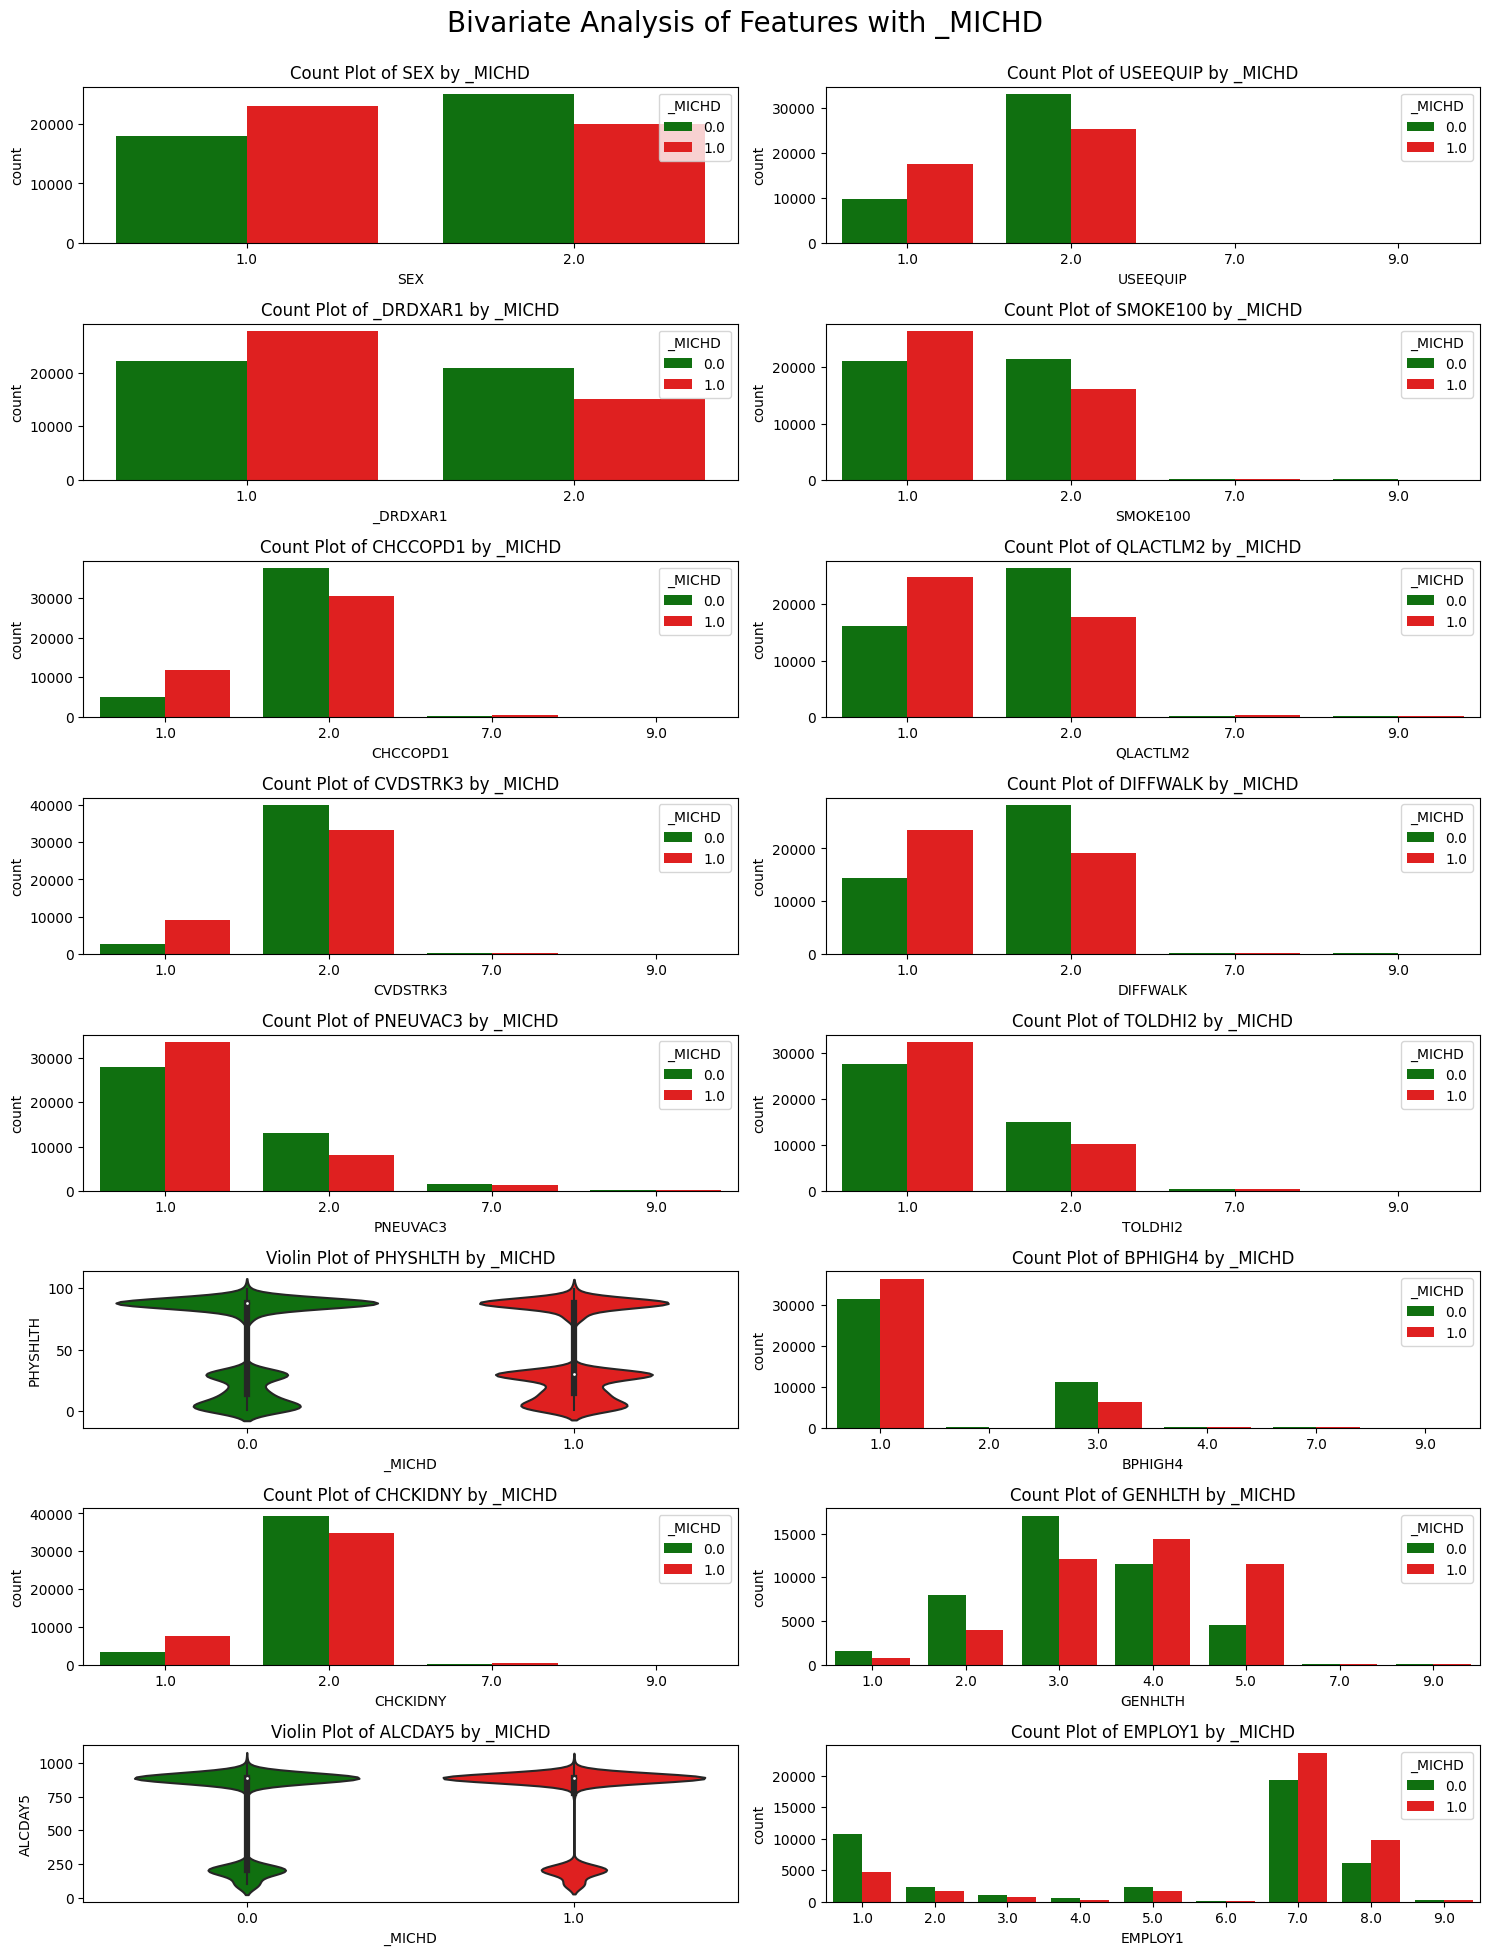

In [68]:
# Create a figure to contain the subcharts
plt.figure(figsize=(15, 40))

# Go through all the characteristics and create a graphic for each one.
for i, column in enumerate(final_features[0:16]):
    plt.subplot(len(final_features), 2, i + 1)
    
    if pd.api.types.is_numeric_dtype(final_dataset[column]):
        # Violin diagram for numerical variables
        sns.violinplot(x='_MICHD', y=column, data=final_dataset, split=True, palette=['green', 'red'])
        plt.title(f"Violin Plot of {column} by _MICHD")
    else:
        # Countplot for categorical variables, grouped by the target variable '_MICHD'.
        sns.countplot(x=column, hue='_MICHD', data=final_dataset, palette=['green', 'red'])
        plt.title(f"Count Plot of {column} by _MICHD")
        plt.legend(title='_MICHD')
    
    plt.tight_layout()

# Add a general title to the figure
plt.suptitle("Bivariate Analysis of Features with _MICHD", fontsize=20, x=0.5, y=1.01)

# Show the figure
plt.show()


----

## **IMPLEMENTATION OF MODELS**

**Train test split**

In [69]:
target_variable = '_MICHD'  # New target variable
X = final_df.drop(columns=[target_variable])  # Characteristics without the target variable
y = final_df[target_variable]  # New target variable

# Split the data into training and test sets again.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Divide into categorical and numeric features**

In [70]:
# Automatically identify categorical and numeric columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

**Models**

In [71]:
# create a list of models to evaluate

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)), # dibujar un arbol con sus parametros
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),   
    ('Naive Bayes Classifier', GaussianNB()) 
]

# Create the preprocessor that will apply OneHotEncoder to the categorical variables
# and will pass the numeric ones unchanged or apply some scaling if deemed necessary.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_features),
        ('num', StandardScaler(), numeric_features)  # Switch the StandardScaler() to 'passthrough' if prefer nothing
    ])

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # make prediction on the test data
    y_pred = pipeline.predict(X_test)
    
    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print()
    
    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name
        best_pipeline = pipeline

# Retrieve and print the best model and its parameters
if best_model:
    print("Best Model: ", best_model)
    print("Parameters of the Best Model:")
    print(best_pipeline['model'].get_params())

Model Logistic Regression
Cross Validation accuracy:  0.6793142595918842
Test Accuracy:  0.6829410393847588

Model Gradient Boosting
Cross Validation accuracy:  0.6816446868731971
Test Accuracy:  0.6888254486133768

Model KNeighbors Classifier
Cross Validation accuracy:  0.7127855289398866
Test Accuracy:  0.727452808203216

Model Decision Tree Classifier
Cross Validation accuracy:  0.7928513839943607
Test Accuracy:  0.8158937310650198

Model AdaBoost Classifier
Cross Validation accuracy:  0.6786296380139021
Test Accuracy:  0.683931484502447

Model Random Forest
Cross Validation accuracy:  0.8119464996813752
Test Accuracy:  0.8340130505709625

Model XGboost Classifier
Cross Validation accuracy:  0.7038278034294795
Test Accuracy:  0.7130622232579819

Model Naive Bayes Classifier
Cross Validation accuracy:  0.6549029442437134
Test Accuracy:  0.6637730132836168

Best Model:  Random Forest
Parameters of the Best Model:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion':

**Plot decision tree**

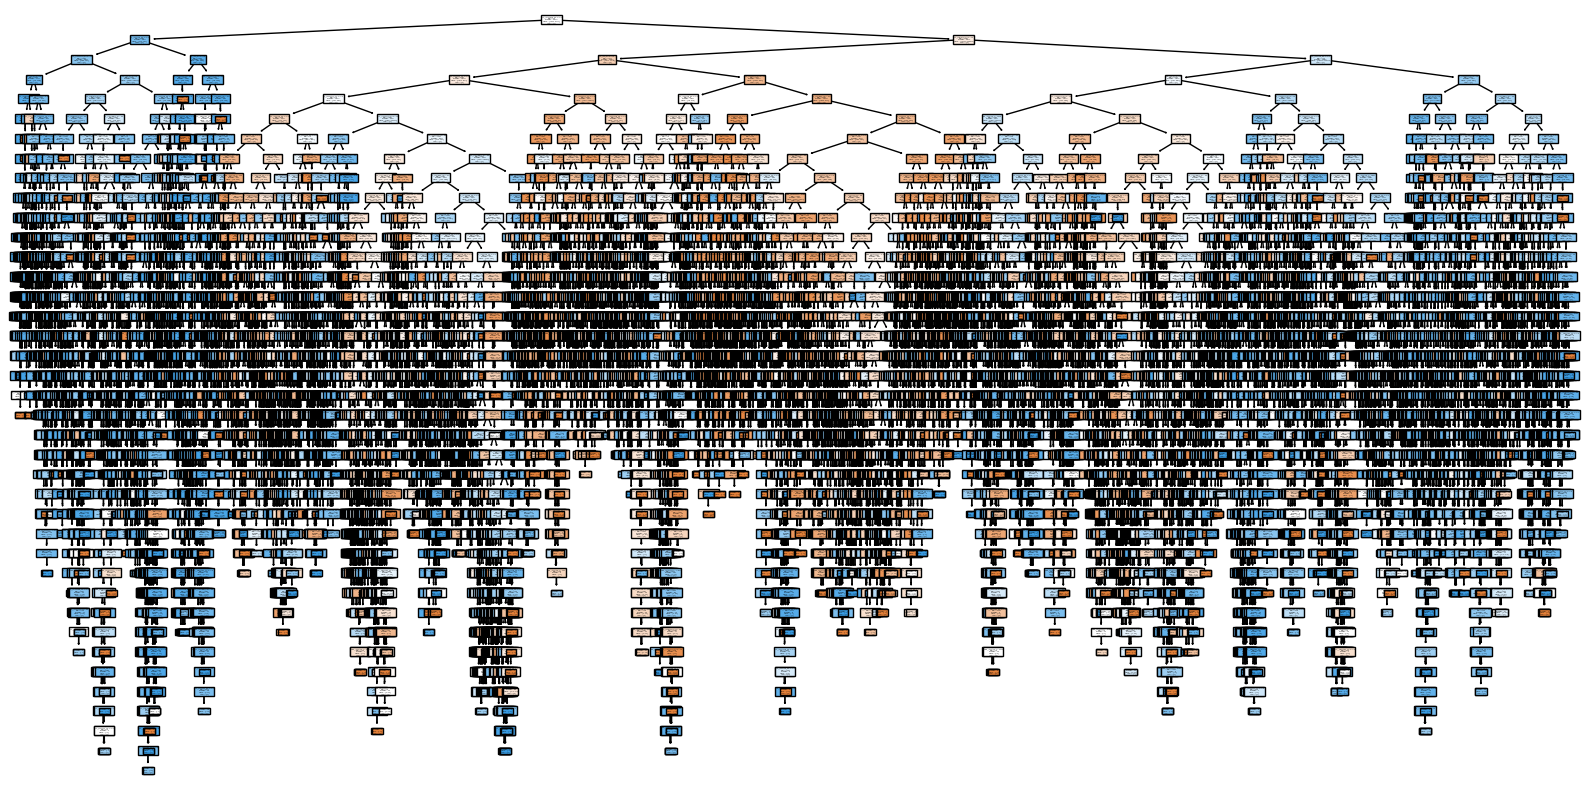

In [72]:
# Extract the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Create a pipeline for the Decision Tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', dt_model)
])

# Fit the pipeline on the training data
dt_pipeline.fit(X_train, y_train)

# Retrieve the fitted Decision Tree model from the pipeline
fitted_tree = dt_pipeline.named_steps['model']

plt.figure(figsize=(20,10))
plot_tree(fitted_tree, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=True)
plt.show()

In [73]:
# TO DO ->>>> hacer tabla 3 x 8 con los dfs de diferentes balanceos y los 8 modelos. Despues coger el mejor de los 24 y hacer el hyper tunning con ese como estoy haciendo ahora.

**Hyperparameter tunning**

In [74]:
# Best model -> Random Forest
best_model_name = 'Random Forest'

'''
best_model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])
'''

# Define the parameters for the GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 3, 4],  
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score obtained
print("\nBest parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", test_accuracy)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits



Best parameters:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.816345261814843
Test set accuracy:  0.8387904917268701


----

## **MODELS' EVALUATION**

**Metrics**

In [75]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall/Sensitivity: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.80
Recall/Sensitivity: 0.89
F1 Score: 0.85


**ROC curve**

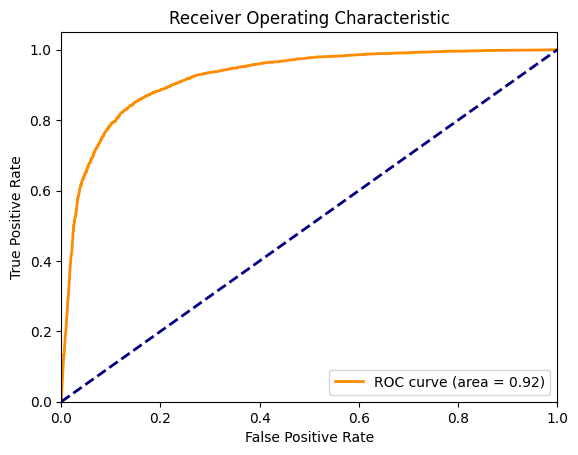

In [76]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Confusion matrix**

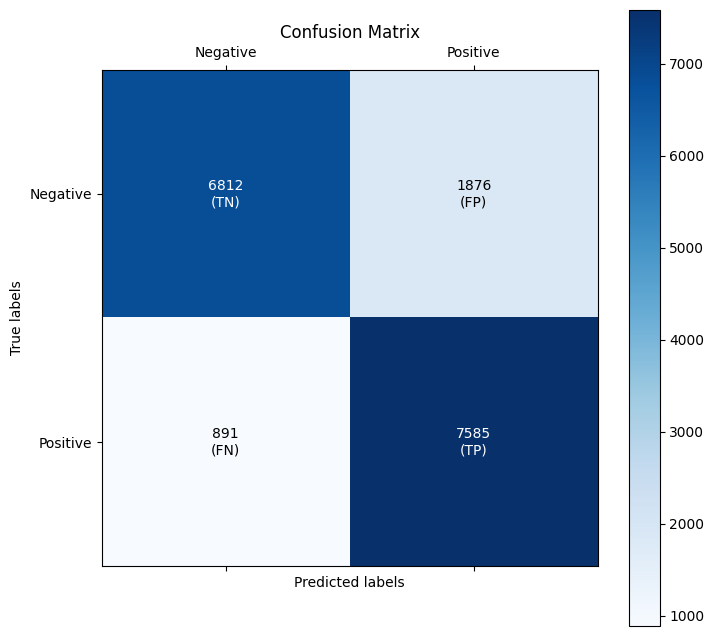

In [77]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
fig.colorbar(cax)

# Setting labels for axes
ax.set_xticklabels([''] + ["Negative", "Positive"])
ax.set_yticklabels([''] + ["Negative", "Positive"])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Annotate each cell with the numeric value and outcome label
labels = ['TN', 'FP', 'FN', 'TP']
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        label = labels[i * 2 + j]
        ax.text(j, i, f"{cm[i, j]}\n({label})", ha='center', va='center',
                color="white" if cm[i, j] > thresh else "black")

plt.show()

**Specificity**

In [78]:
# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.78


----

## **FEATURE IMPORTANCE**

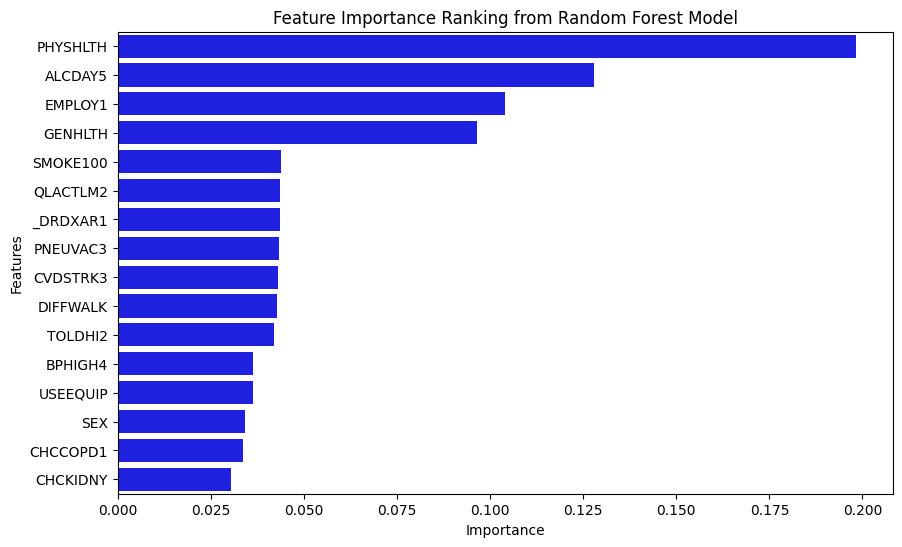

In [79]:
# Assuming 'X_train' is a DataFrame with column names representing features
feature_names = X_train.columns

# Get feature importances from the model
importances = best_model.feature_importances_

# Create a DataFrame to hold the feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame based on the importance of the features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', color='b')
plt.title('Feature Importance Ranking from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

----

## **Models comparison with different features**

**With 4 best features**

In [80]:
target_variable = '_MICHD'  # New target variable
X1 = final_df[['PHYSHLTH', 'ALCDAY5', 'EMPLOY1', 'GENHLTH']]  # Characteristics without the target variable
y1 = final_df[target_variable]  # New target variable

# Split the data into training and test sets again.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [81]:
# Estos son los mejores parámetros que obtuviste de GridSearchCV
best_params = {
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Crear un nuevo modelo con los mejores parámetros
model1 = RandomForestClassifier(**best_params, random_state=42)

# Suponiendo que tienes nuevos conjuntos de datos X_new_train, y_new_train para entrenar
# y X_new_test, y_new_test para probar
# Entrenar el modelo con el nuevo conjunto de entrenamiento
model1.fit(X_train1, y_train1)

# Evaluar el modelo en el nuevo conjunto de prueba
y_pred1 = model1.predict(X_test1)
test_accuracy1 = accuracy_score(y_test1, y_pred1)

print(f"Test accuracy on new data set: {test_accuracy1}")

Test accuracy on new data set: 0.6576555581449546


**With all features**

In [82]:
target_variable = '_MICHD'  # New target variable
X2 = df_balanced_us.drop(columns=[target_variable])  # Characteristics without the target variable
y2 = df_balanced_us[target_variable]  # New target variable

# Split the data into training and test sets again.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [83]:
# Estos son los mejores parámetros que obtuviste de GridSearchCV
best_params = {
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Crear un nuevo modelo con los mejores parámetros
model2 = RandomForestClassifier(**best_params, random_state=42)

# Suponiendo que tienes nuevos conjuntos de datos X_new_train, y_new_train para entrenar
# y X_new_test, y_new_test para probar
# Entrenar el modelo con el nuevo conjunto de entrenamiento
model2.fit(X_train2, y_train2)

# Evaluar el modelo en el nuevo conjunto de prueba
y_pred2 = model2.predict(X_test2)
test_accuracy2 = accuracy_score(y_test2, y_pred2)

print(f"Test accuracy on new data set: {test_accuracy2}")

Test accuracy on new data set: 0.9430202749941738


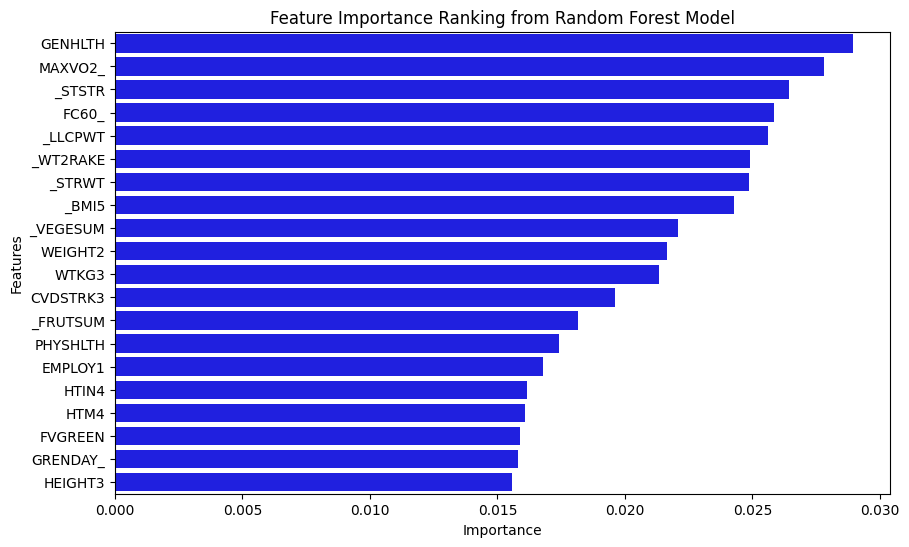

In [84]:
# Assuming 'X_train' is a DataFrame with column names representing features
feature_names = X_train2.columns

# Get feature importances from the model
importances = model2.feature_importances_

# Create a DataFrame to hold the feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame based on the importance of the features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 20 features
top_20_features = feature_importance_df.head(20)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_features, x='Importance', y='Feature', color='b')
plt.title('Feature Importance Ranking from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

**With the features of feature selection**

In [85]:
target_variable = '_MICHD'  # New target variable
X3 = final_df.drop(columns=[target_variable])  # Characteristics without the target variable
y3 = final_df[target_variable]  # New target variable

# Split the data into training and test sets again.
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [86]:
# Estos son los mejores parámetros que obtuviste de GridSearchCV
best_params = {
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Crear un nuevo modelo con los mejores parámetros
model3 = RandomForestClassifier(**best_params, random_state=42)

# Suponiendo que tienes nuevos conjuntos de datos X_new_train, y_new_train para entrenar
# y X_new_test, y_new_test para probar
# Entrenar el modelo con el nuevo conjunto de entrenamiento
model3.fit(X_train3, y_train3)

# Evaluar el modelo en el nuevo conjunto de prueba
y_pred3 = model3.predict(X_test3)
test_accuracy3 = accuracy_score(y_test3, y_pred3)

print(f"Test accuracy on new data set: {test_accuracy3}")

Test accuracy on new data set: 0.8387904917268701
